In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#change filename here if necessary
filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [2]:
#using OHLC mean pricing to gauge worth of a stock
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
open_prices = df.loc[:,'Open'].as_matrix()
close_prices = df.loc[:,'Close'].as_matrix()
OHLC_mean = (high_prices+low_prices+open_prices+close_prices)/4.0

print(OHLC_mean)

[  4.13783425   4.263393     4.29380375 ... 222.71250125 225.21250525
 224.737499  ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [3]:
#Normalizing of data using first 4400 entries
scaler = MinMaxScaler()
OHLC_mean_scaled = OHLC_mean[:4400].reshape(-1,1)
OHLC_mean_scaled = scaler.fit_transform(OHLC_mean_scaled)
train_data = OHLC_mean_scaled


print(OHLC_mean_scaled)

[[0.01776186]
 [0.0184579 ]
 [0.01862648]
 ...
 [1.        ]
 [0.98862197]
 [0.98636298]]


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

predictions = []

#model is created here with RMSprop as the optimizer. Each step_size of x does a prediction x days into the future 

for step_size in range(1,121):
    X = OHLC_mean_scaled[:-step_size]
    Y = OHLC_mean_scaled[step_size:]

    trainX = X.reshape(-1, 1,1)
    
    trainY = Y 


    #building and training the model
    model = Sequential()
    model.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile( loss='mean_squared_error', optimizer='RMSprop')
    model.fit(trainX, trainY, batch_size=32, epochs=100, verbose = 1)

    #makes a prediction depending on the value of step_size
    trainPredict = model.predict(trainX)
    last_val = trainPredict[-1]
    last_val_scaled = last_val/last_val
    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    next_val = last_val*next_val
    
    predictions.append(next_val)
    
print (predictions)


Epoch 1/100
4399/4399 [==============================] - 3s 592us/step - loss: 0.0787
Epoch 2/100
4399/4399 [==============================] - 1s 246us/step - loss: 0.0129
Epoch 3/100
4399/4399 [==============================] - 1s 252us/step - loss: 8.8146e-05
Epoch 4/100
4399/4399 [==============================] - 1s 247us/step - loss: 5.1761e-05
Epoch 5/100
4399/4399 [==============================] - 1s 248us/step - loss: 4.6572e-05
Epoch 6/100
4399/4399 [==============================] - 1s 248us/step - loss: 4.4139e-05
Epoch 7/100
4399/4399 [==============================] - 1s 252us/step - loss: 4.4853e-05
Epoch 8/100
4399/4399 [==============================] - 1s 254us/step - loss: 4.4107e-05
Epoch 9/100
4399/4399 [==============================] - 1s 259us/step - loss: 4.2387e-05
Epoch 10/100
4399/4399 [==============================] - 1s 292us/step - loss: 4.3906e-05
Epoch 11/100
4399/4399 [==============================] - 1s 274us/step - loss: 4.3246e-05
Epoch 12/100
439

4399/4399 [==============================] - 1s 234us/step - loss: 4.0989e-05
Epoch 92/100
4399/4399 [==============================] - 1s 232us/step - loss: 3.8973e-05
Epoch 93/100
4399/4399 [==============================] - 1s 236us/step - loss: 3.9266e-05
Epoch 94/100
4399/4399 [==============================] - 1s 235us/step - loss: 4.0284e-05
Epoch 95/100
4399/4399 [==============================] - 1s 234us/step - loss: 4.1755e-05
Epoch 96/100
4399/4399 [==============================] - 1s 235us/step - loss: 3.9986e-05
Epoch 97/100
4399/4399 [==============================] - 1s 243us/step - loss: 4.2791e-05
Epoch 98/100
4399/4399 [==============================] - 1s 251us/step - loss: 3.9762e-05
Epoch 99/100
4399/4399 [==============================] - 1s 246us/step - loss: 4.0027e-05
Epoch 100/100
4399/4399 [==============================] - 1s 242us/step - loss: 4.0019e-05
Epoch 1/100
4398/4398 [==============================] - 2s 533us/step - loss: 0.0829
Epoch 2/100
4398

4398/4398 [==============================] - 1s 244us/step - loss: 7.2756e-05
Epoch 82/100
4398/4398 [==============================] - 1s 251us/step - loss: 7.2758e-05
Epoch 83/100
4398/4398 [==============================] - 1s 254us/step - loss: 7.2484e-05
Epoch 84/100
4398/4398 [==============================] - 1s 254us/step - loss: 7.3978e-05
Epoch 85/100
4398/4398 [==============================] - 1s 242us/step - loss: 7.3256e-05
Epoch 86/100
4398/4398 [==============================] - ETA: 0s - loss: 7.1655e-0 - 1s 237us/step - loss: 7.1905e-05
Epoch 87/100
4398/4398 [==============================] - 1s 245us/step - loss: 7.5385e-05
Epoch 88/100
4398/4398 [==============================] - 1s 242us/step - loss: 7.1257e-05
Epoch 89/100
4398/4398 [==============================] - 1s 254us/step - loss: 7.1383e-05
Epoch 90/100
4398/4398 [==============================] - 1s 273us/step - loss: 7.3080e-05
Epoch 91/100
4398/4398 [==============================] - 1s 258us/step - l

4397/4397 [==============================] - 1s 269us/step - loss: 1.0956e-04
Epoch 72/100
4397/4397 [==============================] - 1s 265us/step - loss: 1.0705e-04
Epoch 73/100
4397/4397 [==============================] - 1s 238us/step - loss: 1.0762e-04
Epoch 74/100
4397/4397 [==============================] - 1s 246us/step - loss: 1.0910e-04
Epoch 75/100
4397/4397 [==============================] - 1s 231us/step - loss: 1.0626e-04
Epoch 76/100
4397/4397 [==============================] - 1s 228us/step - loss: 1.0459e-04
Epoch 77/100
4397/4397 [==============================] - 1s 227us/step - loss: 1.0873e-04
Epoch 78/100
4397/4397 [==============================] - 1s 227us/step - loss: 1.0590e-04
Epoch 79/100
4397/4397 [==============================] - 1s 226us/step - loss: 1.0644e-04
Epoch 80/100
4397/4397 [==============================] - 1s 227us/step - loss: 1.0898e-04
Epoch 81/100
4397/4397 [==============================] - 1s 237us/step - loss: 1.0636e-04
Epoch 82/100

4396/4396 [==============================] - 1s 256us/step - loss: 1.3463e-04
Epoch 62/100
4396/4396 [==============================] - 1s 270us/step - loss: 1.3287e-04
Epoch 63/100
4396/4396 [==============================] - 1s 251us/step - loss: 1.3526e-04
Epoch 64/100
4396/4396 [==============================] - 1s 249us/step - loss: 1.3658e-04
Epoch 65/100
4396/4396 [==============================] - 1s 264us/step - loss: 1.3320e-04
Epoch 66/100
4396/4396 [==============================] - 1s 261us/step - loss: 1.3489e-04
Epoch 67/100
4396/4396 [==============================] - 1s 249us/step - loss: 1.3476e-04
Epoch 68/100
4396/4396 [==============================] - 1s 265us/step - loss: 1.3391e-04
Epoch 69/100
4396/4396 [==============================] - 1s 255us/step - loss: 1.3730e-04
Epoch 70/100
4396/4396 [==============================] - 1s 245us/step - loss: 1.3762e-04
Epoch 71/100
4396/4396 [==============================] - 1s 261us/step - loss: 1.3447e-04
Epoch 72/100

4395/4395 [==============================] - 1s 267us/step - loss: 1.6890e-04
Epoch 52/100
4395/4395 [==============================] - 1s 256us/step - loss: 1.6969e-04
Epoch 53/100
4395/4395 [==============================] - 1s 241us/step - loss: 1.6972e-04
Epoch 54/100
4395/4395 [==============================] - 1s 256us/step - loss: 1.7073e-04
Epoch 55/100
4395/4395 [==============================] - 1s 236us/step - loss: 1.7238e-04
Epoch 56/100
4395/4395 [==============================] - 1s 237us/step - loss: 1.7047e-04
Epoch 57/100
4395/4395 [==============================] - 1s 259us/step - loss: 1.6871e-04
Epoch 58/100
4395/4395 [==============================] - 1s 272us/step - loss: 1.7157e-04 
Epoch 59/100
4395/4395 [==============================] - 1s 265us/step - loss: 1.7022e-04
Epoch 60/100
4395/4395 [==============================] - 1s 232us/step - loss: 1.6750e-04
Epoch 61/100
4395/4395 [==============================] - 1s 224us/step - loss: 1.6882e-04
Epoch 62/10

4394/4394 [==============================] - 1s 246us/step - loss: 2.0579e-04
Epoch 42/100
4394/4394 [==============================] - 1s 231us/step - loss: 2.0527e-04
Epoch 43/100
4394/4394 [==============================] - 1s 233us/step - loss: 2.0479e-04
Epoch 44/100
4394/4394 [==============================] - 1s 237us/step - loss: 2.0458e-04
Epoch 45/100
4394/4394 [==============================] - 1s 232us/step - loss: 2.0287e-04
Epoch 46/100
4394/4394 [==============================] - 1s 231us/step - loss: 2.0527e-04
Epoch 47/100
4394/4394 [==============================] - 1s 234us/step - loss: 2.0642e-04
Epoch 48/100
4394/4394 [==============================] - 1s 227us/step - loss: 2.0819e-04
Epoch 49/100
4394/4394 [==============================] - 1s 232us/step - loss: 2.0451e-04
Epoch 50/100
4394/4394 [==============================] - 1s 239us/step - loss: 2.0577e-04
Epoch 51/100
4394/4394 [==============================] - ETA: 0s - loss: 2.0500e-0 - 1s 239us/step - l

Epoch 31/100
4393/4393 [==============================] - 1s 240us/step - loss: 2.3617e-04
Epoch 32/100
4393/4393 [==============================] - 1s 304us/step - loss: 2.4140e-04
Epoch 33/100
4393/4393 [==============================] - 1s 279us/step - loss: 2.4066e-04
Epoch 34/100
4393/4393 [==============================] - 1s 242us/step - loss: 2.3809e-04
Epoch 35/100
4393/4393 [==============================] - 1s 267us/step - loss: 2.3926e-04
Epoch 36/100
4393/4393 [==============================] - 1s 254us/step - loss: 2.4148e-04
Epoch 37/100
4393/4393 [==============================] - 1s 337us/step - loss: 2.3647e-04
Epoch 38/100
4393/4393 [==============================] - 1s 279us/step - loss: 2.4083e-04
Epoch 39/100
4393/4393 [==============================] - 1s 246us/step - loss: 2.3807e-04
Epoch 40/100
4393/4393 [==============================] - 1s 259us/step - loss: 2.3742e-04
Epoch 41/100
4393/4393 [==============================] - 1s 249us/step - loss: 2.3882e-04

4392/4392 [==============================] - 1s 235us/step - loss: 2.7499e-04
Epoch 22/100
4392/4392 [==============================] - 1s 247us/step - loss: 2.7117e-04
Epoch 23/100
4392/4392 [==============================] - 1s 256us/step - loss: 2.6925e-04
Epoch 24/100
4392/4392 [==============================] - 1s 241us/step - loss: 2.7384e-04
Epoch 25/100
4392/4392 [==============================] - 1s 239us/step - loss: 2.7189e-04
Epoch 26/100
4392/4392 [==============================] - 1s 234us/step - loss: 2.7517e-04
Epoch 27/100
4392/4392 [==============================] - 1s 238us/step - loss: 2.7571e-04
Epoch 28/100
4392/4392 [==============================] - 1s 238us/step - loss: 2.7062e-04
Epoch 29/100
4392/4392 [==============================] - 1s 239us/step - loss: 2.7084e-04
Epoch 30/100
4392/4392 [==============================] - 1s 264us/step - loss: 2.6818e-04
Epoch 31/100
4392/4392 [==============================] - 1s 240us/step - loss: 2.7465e-04
Epoch 32/100

4391/4391 [==============================] - 1s 241us/step - loss: 3.1023e-04
Epoch 12/100
4391/4391 [==============================] - 1s 235us/step - loss: 3.1034e-04
Epoch 13/100
4391/4391 [==============================] - 1s 238us/step - loss: 3.0476e-04
Epoch 14/100
4391/4391 [==============================] - 1s 279us/step - loss: 3.0758e-04
Epoch 15/100
4391/4391 [==============================] - 1s 239us/step - loss: 3.1054e-04
Epoch 16/100
4391/4391 [==============================] - 1s 238us/step - loss: 3.0778e-04
Epoch 17/100
4391/4391 [==============================] - 1s 245us/step - loss: 2.9977e-04
Epoch 18/100
4391/4391 [==============================] - 1s 260us/step - loss: 3.0294e-04
Epoch 19/100
4391/4391 [==============================] - 1s 248us/step - loss: 3.1167e-04
Epoch 20/100
4391/4391 [==============================] - 1s 231us/step - loss: 3.1184e-04
Epoch 21/100
4391/4391 [==============================] - 1s 263us/step - loss: 3.0722e-04
Epoch 22/100

4390/4390 [==============================] - 3s 742us/step - loss: 0.0710
Epoch 2/100
4390/4390 [==============================] - 1s 232us/step - loss: 0.0107
Epoch 3/100
4390/4390 [==============================] - 1s 234us/step - loss: 4.1496e-04
Epoch 4/100
4390/4390 [==============================] - 1s 257us/step - loss: 3.6330e-04
Epoch 5/100
4390/4390 [==============================] - 1s 258us/step - loss: 3.5084e-04
Epoch 6/100
4390/4390 [==============================] - 1s 250us/step - loss: 3.4806e-04
Epoch 7/100
4390/4390 [==============================] - 1s 250us/step - loss: 3.4393e-04
Epoch 8/100
4390/4390 [==============================] - 1s 238us/step - loss: 3.3680e-04
Epoch 9/100
4390/4390 [==============================] - 1s 234us/step - loss: 3.4136e-04
Epoch 10/100
4390/4390 [==============================] - 1s 259us/step - loss: 3.3736e-04
Epoch 11/100
4390/4390 [==============================] - 1s 245us/step - loss: 3.4012e-04
Epoch 12/100
4390/4390 [====

4390/4390 [==============================] - 1s 240us/step - loss: 3.3676e-04
Epoch 92/100
4390/4390 [==============================] - 1s 239us/step - loss: 3.2898e-04
Epoch 93/100
4390/4390 [==============================] - 1s 240us/step - loss: 3.3221e-04
Epoch 94/100
4390/4390 [==============================] - 1s 257us/step - loss: 3.3236e-04
Epoch 95/100
4390/4390 [==============================] - 1s 232us/step - loss: 3.3026e-04
Epoch 96/100
4390/4390 [==============================] - 1s 238us/step - loss: 3.3449e-04
Epoch 97/100
4390/4390 [==============================] - 1s 233us/step - loss: 3.3331e-04
Epoch 98/100
4390/4390 [==============================] - 1s 244us/step - loss: 3.3697e-04
Epoch 99/100
4390/4390 [==============================] - 1s 233us/step - loss: 3.2817e-04
Epoch 100/100
4390/4390 [==============================] - 1s 248us/step - loss: 3.3215e-04
Epoch 1/100
4389/4389 [==============================] - 3s 792us/step - loss: 0.0709
Epoch 2/100
4389

4389/4389 [==============================] - 1s 229us/step - loss: 3.7036e-04
Epoch 82/100
4389/4389 [==============================] - 1s 230us/step - loss: 3.7199e-04
Epoch 83/100
4389/4389 [==============================] - 1s 228us/step - loss: 3.6058e-04
Epoch 84/100
4389/4389 [==============================] - 1s 231us/step - loss: 3.6948e-04
Epoch 85/100
4389/4389 [==============================] - 1s 233us/step - loss: 3.6621e-04
Epoch 86/100
4389/4389 [==============================] - 1s 230us/step - loss: 3.7073e-04
Epoch 87/100
4389/4389 [==============================] - 1s 229us/step - loss: 3.7683e-04
Epoch 88/100
4389/4389 [==============================] - 1s 233us/step - loss: 3.7042e-04
Epoch 89/100
4389/4389 [==============================] - 1s 232us/step - loss: 3.7049e-04
Epoch 90/100
4389/4389 [==============================] - 1s 232us/step - loss: 3.7158e-04
Epoch 91/100
4389/4389 [==============================] - 1s 233us/step - loss: 3.6720e-04
Epoch 92/100

4388/4388 [==============================] - 1s 304us/step - loss: 3.9040e-04
Epoch 72/100
4388/4388 [==============================] - 2s 361us/step - loss: 3.9911e-04
Epoch 73/100
4388/4388 [==============================] - 2s 372us/step - loss: 3.9672e-04
Epoch 74/100
4388/4388 [==============================] - 2s 383us/step - loss: 3.9854e-04
Epoch 75/100
4388/4388 [==============================] - 1s 339us/step - loss: 3.9453e-04
Epoch 76/100
4388/4388 [==============================] - 1s 285us/step - loss: 3.9650e-04
Epoch 77/100
4388/4388 [==============================] - 1s 273us/step - loss: 3.9604e-04
Epoch 78/100
4388/4388 [==============================] - 1s 248us/step - loss: 3.9376e-04
Epoch 79/100
4388/4388 [==============================] - 1s 264us/step - loss: 3.9552e-04
Epoch 80/100
4388/4388 [==============================] - 1s 243us/step - loss: 3.9868e-04
Epoch 81/100
4388/4388 [==============================] - 1s 250us/step - loss: 3.9737e-04
Epoch 82/100

4387/4387 [==============================] - 2s 442us/step - loss: 4.3664e-04
Epoch 62/100
4387/4387 [==============================] - 1s 316us/step - loss: 4.3025e-04
Epoch 63/100
4387/4387 [==============================] - 1s 340us/step - loss: 4.3038e-04
Epoch 64/100
4387/4387 [==============================] - 1s 285us/step - loss: 4.2343e-04
Epoch 65/100
4387/4387 [==============================] - 1s 279us/step - loss: 4.3186e-04
Epoch 66/100
4387/4387 [==============================] - 1s 243us/step - loss: 4.2757e-04
Epoch 67/100
4387/4387 [==============================] - 1s 261us/step - loss: 4.3839e-04
Epoch 68/100
4387/4387 [==============================] - 1s 239us/step - loss: 4.2660e-04
Epoch 69/100
4387/4387 [==============================] - 1s 261us/step - loss: 4.3354e-04
Epoch 70/100
4387/4387 [==============================] - 1s 262us/step - loss: 4.3029e-04
Epoch 71/100
4387/4387 [==============================] - 1s 250us/step - loss: 4.3640e-04
Epoch 72/100

Epoch 51/100
4386/4386 [==============================] - 1s 251us/step - loss: 4.5679e-04
Epoch 52/100
4386/4386 [==============================] - 1s 249us/step - loss: 4.5662e-04
Epoch 53/100
4386/4386 [==============================] - 1s 258us/step - loss: 4.4950e-04
Epoch 54/100
4386/4386 [==============================] - 1s 252us/step - loss: 4.5884e-04
Epoch 55/100
4386/4386 [==============================] - 1s 252us/step - loss: 4.5889e-04
Epoch 56/100
4386/4386 [==============================] - 1s 256us/step - loss: 4.5378e-04
Epoch 57/100
4386/4386 [==============================] - 1s 295us/step - loss: 4.5668e-04
Epoch 58/100
4386/4386 [==============================] - 1s 244us/step - loss: 4.6026e-04
Epoch 59/100
4386/4386 [==============================] - 1s 268us/step - loss: 4.5822e-04
Epoch 60/100
4386/4386 [==============================] - 1s 238us/step - loss: 4.6457e-04
Epoch 61/100
4386/4386 [==============================] - 1s 247us/step - loss: 4.4855e-04

4385/4385 [==============================] - 1s 260us/step - loss: 4.9264e-04
Epoch 42/100
4385/4385 [==============================] - 1s 235us/step - loss: 4.9033e-04
Epoch 43/100
4385/4385 [==============================] - 1s 234us/step - loss: 4.9480e-04
Epoch 44/100
4385/4385 [==============================] - 1s 238us/step - loss: 4.9255e-04
Epoch 45/100
4385/4385 [==============================] - 1s 237us/step - loss: 4.8996e-04
Epoch 46/100
4385/4385 [==============================] - 1s 238us/step - loss: 4.8825e-04
Epoch 47/100
4385/4385 [==============================] - 1s 237us/step - loss: 4.9819e-04
Epoch 48/100
4385/4385 [==============================] - 1s 238us/step - loss: 4.9387e-04
Epoch 49/100
4385/4385 [==============================] - 1s 239us/step - loss: 4.9438e-04
Epoch 50/100
4385/4385 [==============================] - 1s 236us/step - loss: 4.9795e-04
Epoch 51/100
4385/4385 [==============================] - 1s 238us/step - loss: 4.8823e-04
Epoch 52/100

4384/4384 [==============================] - 1s 232us/step - loss: 5.2009e-04
Epoch 32/100
4384/4384 [==============================] - 1s 231us/step - loss: 5.1479e-04
Epoch 33/100
4384/4384 [==============================] - 1s 229us/step - loss: 5.1842e-04
Epoch 34/100
4384/4384 [==============================] - 1s 231us/step - loss: 5.2530e-04
Epoch 35/100
4384/4384 [==============================] - 1s 233us/step - loss: 5.1610e-04
Epoch 36/100
4384/4384 [==============================] - 1s 234us/step - loss: 5.1957e-04
Epoch 37/100
4384/4384 [==============================] - 1s 232us/step - loss: 5.1775e-04
Epoch 38/100
4384/4384 [==============================] - 1s 230us/step - loss: 5.2468e-04
Epoch 39/100
4384/4384 [==============================] - 1s 229us/step - loss: 5.2916e-04
Epoch 40/100
4384/4384 [==============================] - 1s 232us/step - loss: 5.2562e-04
Epoch 41/100
4384/4384 [==============================] - 1s 235us/step - loss: 5.2277e-04
Epoch 42/100

4383/4383 [==============================] - 1s 234us/step - loss: 5.5162e-04
Epoch 22/100
4383/4383 [==============================] - 1s 237us/step - loss: 5.5704e-04
Epoch 23/100
4383/4383 [==============================] - ETA: 0s - loss: 5.6811e-0 - 1s 233us/step - loss: 5.6483e-04
Epoch 24/100
4383/4383 [==============================] - 1s 238us/step - loss: 5.6319e-04
Epoch 25/100
4383/4383 [==============================] - 1s 233us/step - loss: 5.5779e-04
Epoch 26/100
4383/4383 [==============================] - 1s 236us/step - loss: 5.6195e-04
Epoch 27/100
4383/4383 [==============================] - 1s 234us/step - loss: 5.5976e-04
Epoch 28/100
4383/4383 [==============================] - 1s 233us/step - loss: 5.5363e-04
Epoch 29/100
4383/4383 [==============================] - 1s 232us/step - loss: 5.5791e-04
Epoch 30/100
4383/4383 [==============================] - 1s 254us/step - loss: 5.6545e-04
Epoch 31/100
4383/4383 [==============================] - 1s 239us/step - l

Epoch 11/100
4382/4382 [==============================] - 1s 235us/step - loss: 5.9783e-04
Epoch 12/100
4382/4382 [==============================] - 1s 236us/step - loss: 5.9175e-04
Epoch 13/100
4382/4382 [==============================] - 1s 236us/step - loss: 5.9515e-04
Epoch 14/100
4382/4382 [==============================] - 1s 236us/step - loss: 5.8921e-04
Epoch 15/100
4382/4382 [==============================] - 1s 241us/step - loss: 5.9645e-04
Epoch 16/100
4382/4382 [==============================] - 1s 270us/step - loss: 5.9266e-04
Epoch 17/100
4382/4382 [==============================] - 1s 239us/step - loss: 5.9431e-04
Epoch 18/100
4382/4382 [==============================] - 1s 236us/step - loss: 5.9356e-04
Epoch 19/100
4382/4382 [==============================] - 1s 239us/step - loss: 5.9176e-04
Epoch 20/100
4382/4382 [==============================] - 1s 238us/step - loss: 5.9032e-04
Epoch 21/100
4382/4382 [==============================] - 1s 238us/step - loss: 5.9122e-04

Epoch 1/100
4381/4381 [==============================] - 8s 2ms/step - loss: 0.0808
Epoch 2/100
4381/4381 [==============================] - 1s 307us/step - loss: 0.0176
Epoch 3/100
4381/4381 [==============================] - 1s 296us/step - loss: 7.6686e-04
Epoch 4/100
4381/4381 [==============================] - 3s 670us/step - loss: 6.3388e-04
Epoch 5/100
4381/4381 [==============================] - 2s 548us/step - loss: 6.3148e-04
Epoch 6/100
4381/4381 [==============================] - 2s 467us/step - loss: 6.2792e-04
Epoch 7/100
4381/4381 [==============================] - 2s 469us/step - loss: 6.2985e-04
Epoch 8/100
4381/4381 [==============================] - 2s 458us/step - loss: 6.2366e-04
Epoch 9/100
4381/4381 [==============================] - 2s 422us/step - loss: 6.2158e-04
Epoch 10/100
4381/4381 [==============================] - 1s 303us/step - loss: 6.1764e-04
Epoch 11/100
4381/4381 [==============================] - 2s 458us/step - loss: 6.2409e-04
Epoch 12/100
4381/

4381/4381 [==============================] - 2s 440us/step - loss: 6.0983e-04
Epoch 92/100
4381/4381 [==============================] - 2s 440us/step - loss: 6.1145e-04
Epoch 93/100
4381/4381 [==============================] - 2s 441us/step - loss: 5.9962e-04
Epoch 94/100
4381/4381 [==============================] - 2s 398us/step - loss: 6.0304e-04
Epoch 95/100
4381/4381 [==============================] - 2s 364us/step - loss: 6.0721e-04
Epoch 96/100
4381/4381 [==============================] - 2s 439us/step - loss: 6.0531e-04
Epoch 97/100
4381/4381 [==============================] - 2s 439us/step - loss: 6.1055e-04
Epoch 98/100
4381/4381 [==============================] - 2s 441us/step - loss: 6.0206e-04
Epoch 99/100
4381/4381 [==============================] - 2s 407us/step - loss: 6.1130e-04
Epoch 100/100
4381/4381 [==============================] - 2s 441us/step - loss: 6.0776e-04
Epoch 1/100
4380/4380 [==============================] - 7s 2ms/step - loss: 0.0671
Epoch 2/100
4380/4

4380/4380 [==============================] - 2s 549us/step - loss: 6.4637e-04
Epoch 82/100
4380/4380 [==============================] - 2s 489us/step - loss: 6.4383e-04
Epoch 83/100
4380/4380 [==============================] - 1s 318us/step - loss: 6.4805e-04
Epoch 84/100
4380/4380 [==============================] - 2s 456us/step - loss: 6.4436e-04
Epoch 85/100
4380/4380 [==============================] - 3s 613us/step - loss: 6.4516e-04
Epoch 86/100
4380/4380 [==============================] - 3s 614us/step - loss: 6.5004e-04
Epoch 87/100
4380/4380 [==============================] - 3s 599us/step - loss: 6.4562e-04
Epoch 88/100
4380/4380 [==============================] - 2s 385us/step - loss: 6.4035e-04
Epoch 89/100
4380/4380 [==============================] - 2s 391us/step - loss: 6.4755e-04
Epoch 90/100
4380/4380 [==============================] - 2s 379us/step - loss: 6.4667e-04
Epoch 91/100
4380/4380 [==============================] - 1s 306us/step - loss: 6.5370e-04
Epoch 92/100

4379/4379 [==============================] - 1s 307us/step - loss: 6.8550e-04
Epoch 72/100
4379/4379 [==============================] - 1s 308us/step - loss: 6.8001e-04
Epoch 73/100
4379/4379 [==============================] - 1s 304us/step - loss: 6.7510e-04
Epoch 74/100
4379/4379 [==============================] - 1s 310us/step - loss: 6.7778e-04
Epoch 75/100
4379/4379 [==============================] - 1s 307us/step - loss: 6.8536e-04
Epoch 76/100
4379/4379 [==============================] - 1s 312us/step - loss: 6.8529e-04
Epoch 77/100
4379/4379 [==============================] - 1s 306us/step - loss: 6.8620e-04
Epoch 78/100
4379/4379 [==============================] - 1s 309us/step - loss: 6.7728e-04
Epoch 79/100
4379/4379 [==============================] - 1s 332us/step - loss: 6.7297e-04
Epoch 80/100
4379/4379 [==============================] - 1s 307us/step - loss: 6.8807e-04
Epoch 81/100
4379/4379 [==============================] - 1s 308us/step - loss: 6.8760e-04
Epoch 82/100

4378/4378 [==============================] - 2s 555us/step - loss: 7.1484e-04
Epoch 62/100
4378/4378 [==============================] - 3s 614us/step - loss: 7.2704e-04
Epoch 63/100
4378/4378 [==============================] - 3s 579us/step - loss: 7.1940e-04
Epoch 64/100
4378/4378 [==============================] - 3s 613us/step - loss: 7.1544e-04
Epoch 65/100
4378/4378 [==============================] - 3s 615us/step - loss: 7.1347e-04
Epoch 66/100
4378/4378 [==============================] - 2s 451us/step - loss: 7.1931e-04
Epoch 67/100
4378/4378 [==============================] - 2s 434us/step - loss: 7.2532e-04
Epoch 68/100
4378/4378 [==============================] - 2s 570us/step - loss: 7.2144e-04
Epoch 69/100
4378/4378 [==============================] - 2s 468us/step - loss: 7.1648e-04
Epoch 70/100
4378/4378 [==============================] - 2s 467us/step - loss: 7.1122e-04
Epoch 71/100
4378/4378 [==============================] - 2s 467us/step - loss: 7.2034e-04
Epoch 72/100

4377/4377 [==============================] - 1s 302us/step - loss: 7.3962e-04
Epoch 52/100
4377/4377 [==============================] - 2s 552us/step - loss: 7.4594e-04
Epoch 53/100
4377/4377 [==============================] - 3s 610us/step - loss: 7.5069e-04
Epoch 54/100
4377/4377 [==============================] - 3s 607us/step - loss: 7.3409e-04
Epoch 55/100
4377/4377 [==============================] - 1s 321us/step - loss: 7.4546e-04
Epoch 56/100
4377/4377 [==============================] - 1s 302us/step - loss: 7.4571e-04 
Epoch 57/100
4377/4377 [==============================] - 1s 302us/step - loss: 7.4058e-04
Epoch 58/100
4377/4377 [==============================] - 2s 552us/step - loss: 7.4134e-04
Epoch 59/100
4377/4377 [==============================] - 2s 546us/step - loss: 7.3489e-04
Epoch 60/100
4377/4377 [==============================] - 3s 610us/step - loss: 7.4180e-04
Epoch 61/100
4377/4377 [==============================] - 3s 613us/step - loss: 7.4797e-04
Epoch 62/10

4376/4376 [==============================] - 2s 404us/step - loss: 7.8486e-04
Epoch 42/100
4376/4376 [==============================] - 2s 519us/step - loss: 7.7006e-04
Epoch 43/100
4376/4376 [==============================] - 2s 466us/step - loss: 7.7476e-04
Epoch 44/100
4376/4376 [==============================] - 2s 361us/step - loss: 7.8591e-04
Epoch 45/100
4376/4376 [==============================] - 2s 481us/step - loss: 7.8310e-04
Epoch 46/100
4376/4376 [==============================] - 2s 476us/step - loss: 7.6320e-04
Epoch 47/100
4376/4376 [==============================] - 2s 490us/step - loss: 7.7894e-04
Epoch 48/100
4376/4376 [==============================] - 2s 483us/step - loss: 7.7117e-04
Epoch 49/100
4376/4376 [==============================] - 2s 487us/step - loss: 7.7236e-04
Epoch 50/100
4376/4376 [==============================] - 2s 476us/step - loss: 7.7619e-04
Epoch 51/100
4376/4376 [==============================] - 2s 393us/step - loss: 7.7009e-04
Epoch 52/100

4375/4375 [==============================] - 2s 468us/step - loss: 7.9686e-04
Epoch 32/100
4375/4375 [==============================] - 2s 490us/step - loss: 8.0607e-04
Epoch 33/100
4375/4375 [==============================] - 2s 474us/step - loss: 7.9930e-04
Epoch 34/100
4375/4375 [==============================] - 1s 322us/step - loss: 8.0711e-04
Epoch 35/100
4375/4375 [==============================] - 2s 459us/step - loss: 8.0547e-04
Epoch 36/100
4375/4375 [==============================] - 2s 419us/step - loss: 7.9740e-04
Epoch 37/100
4375/4375 [==============================] - 2s 443us/step - loss: 7.9961e-04
Epoch 38/100
4375/4375 [==============================] - 2s 487us/step - loss: 8.0205e-04
Epoch 39/100
4375/4375 [==============================] - 2s 483us/step - loss: 8.1211e-04
Epoch 40/100
4375/4375 [==============================] - 2s 490us/step - loss: 8.0683e-04
Epoch 41/100
4375/4375 [==============================] - 2s 497us/step - loss: 8.0534e-04
Epoch 42/100

4374/4374 [==============================] - 1s 303us/step - loss: 8.3249e-04
Epoch 22/100
4374/4374 [==============================] - 1s 304us/step - loss: 8.3337e-04
Epoch 23/100
4374/4374 [==============================] - 1s 301us/step - loss: 8.4101e-04
Epoch 24/100
4374/4374 [==============================] - 1s 305us/step - loss: 8.3207e-04
Epoch 25/100
4374/4374 [==============================] - 1s 303us/step - loss: 8.2856e-04
Epoch 26/100
4374/4374 [==============================] - 1s 316us/step - loss: 8.3525e-04
Epoch 27/100
4374/4374 [==============================] - 2s 386us/step - loss: 8.3633e-04
Epoch 28/100
4374/4374 [==============================] - 3s 619us/step - loss: 8.3225e-04
Epoch 29/100
4374/4374 [==============================] - 3s 619us/step - loss: 8.3479e-04
Epoch 30/100
4374/4374 [==============================] - 3s 666us/step - loss: 8.3020e-04
Epoch 31/100
4374/4374 [==============================] - 2s 526us/step - loss: 8.2955e-04
Epoch 32/100

4373/4373 [==============================] - 2s 405us/step - loss: 8.7376e-04
Epoch 12/100
4373/4373 [==============================] - 1s 340us/step - loss: 8.6560e-04
Epoch 13/100
4373/4373 [==============================] - 2s 406us/step - loss: 8.7217e-04
Epoch 14/100
4373/4373 [==============================] - 2s 483us/step - loss: 8.6591e-04
Epoch 15/100
4373/4373 [==============================] - 2s 484us/step - loss: 8.6913e-04
Epoch 16/100
4373/4373 [==============================] - 2s 403us/step - loss: 8.6597e-04
Epoch 17/100
4373/4373 [==============================] - 2s 355us/step - loss: 8.7227e-04
Epoch 18/100
4373/4373 [==============================] - 2s 390us/step - loss: 8.6445e-04
Epoch 19/100
4373/4373 [==============================] - 2s 390us/step - loss: 8.7481e-04
Epoch 20/100
4373/4373 [==============================] - 2s 353us/step - loss: 8.6666e-04
Epoch 21/100
4373/4373 [==============================] - 2s 359us/step - loss: 8.7660e-04
Epoch 22/100

4373/4373 [==============================] - 1s 317us/step - loss: 8.5794e-04
Epoch 1/100
4372/4372 [==============================] - 9s 2ms/step - loss: 0.0742
Epoch 2/100
4372/4372 [==============================] - 2s 449us/step - loss: 0.0153
Epoch 3/100
4372/4372 [==============================] - 2s 446us/step - loss: 0.0012
Epoch 4/100
4372/4372 [==============================] - 1s 313us/step - loss: 9.8060e-04
Epoch 5/100
4372/4372 [==============================] - 1s 337us/step - loss: 9.3050e-04
Epoch 6/100
4372/4372 [==============================] - 1s 338us/step - loss: 9.0183e-04
Epoch 7/100
4372/4372 [==============================] - 1s 332us/step - loss: 9.0716e-04
Epoch 8/100
4372/4372 [==============================] - 2s 542us/step - loss: 9.0123e-04
Epoch 9/100
4372/4372 [==============================] - 2s 355us/step - loss: 9.0317e-04
Epoch 10/100
4372/4372 [==============================] - 1s 310us/step - loss: 9.0456e-04
Epoch 11/100
4372/4372 [===========

4372/4372 [==============================] - 2s 365us/step - loss: 8.7633e-04
Epoch 91/100
4372/4372 [==============================] - 2s 508us/step - loss: 8.9120e-04
Epoch 92/100
4372/4372 [==============================] - 2s 506us/step - loss: 8.8654e-04
Epoch 93/100
4372/4372 [==============================] - 2s 498us/step - loss: 8.9386e-04
Epoch 94/100
4372/4372 [==============================] - 2s 490us/step - loss: 8.9008e-04
Epoch 95/100
4372/4372 [==============================] - 2s 490us/step - loss: 8.7767e-04
Epoch 96/100
4372/4372 [==============================] - 2s 418us/step - loss: 8.9001e-04
Epoch 97/100
4372/4372 [==============================] - 2s 346us/step - loss: 8.7315e-04
Epoch 98/100
4372/4372 [==============================] - 1s 319us/step - loss: 8.7976e-04
Epoch 99/100
4372/4372 [==============================] - 1s 313us/step - loss: 8.8037e-04
Epoch 100/100
4372/4372 [==============================] - 1s 301us/step - loss: 8.7637e-04
Epoch 1/100

4371/4371 [==============================] - 2s 383us/step - loss: 9.1487e-04
Epoch 81/100
4371/4371 [==============================] - 2s 373us/step - loss: 9.1598e-04
Epoch 82/100
4371/4371 [==============================] - 2s 382us/step - loss: 9.2254e-04
Epoch 83/100
4371/4371 [==============================] - 2s 389us/step - loss: 9.0856e-04
Epoch 84/100
4371/4371 [==============================] - 1s 329us/step - loss: 9.1218e-04
Epoch 85/100
4371/4371 [==============================] - 2s 395us/step - loss: 9.0724e-04
Epoch 86/100
4371/4371 [==============================] - 2s 353us/step - loss: 9.1163e-04
Epoch 87/100
4371/4371 [==============================] - 1s 321us/step - loss: 9.1605e-04
Epoch 88/100
4371/4371 [==============================] - 1s 338us/step - loss: 9.1218e-04
Epoch 89/100
4371/4371 [==============================] - 1s 326us/step - loss: 9.1400e-04
Epoch 90/100
4371/4371 [==============================] - 1s 326us/step - loss: 9.0714e-04
Epoch 91/100

4370/4370 [==============================] - 1s 335us/step - loss: 9.5198e-04
Epoch 71/100
4370/4370 [==============================] - 2s 351us/step - loss: 9.5020e-04
Epoch 72/100
4370/4370 [==============================] - 1s 331us/step - loss: 9.6040e-04
Epoch 73/100
4370/4370 [==============================] - 1s 327us/step - loss: 9.5080e-04
Epoch 74/100
4370/4370 [==============================] - 1s 325us/step - loss: 9.5479e-04
Epoch 75/100
4370/4370 [==============================] - 2s 346us/step - loss: 9.4366e-04
Epoch 76/100
4370/4370 [==============================] - 1s 336us/step - loss: 9.4794e-04
Epoch 77/100
4370/4370 [==============================] - 1s 332us/step - loss: 9.5435e-04
Epoch 78/100
4370/4370 [==============================] - 1s 322us/step - loss: 9.4855e-04
Epoch 79/100
4370/4370 [==============================] - 1s 324us/step - loss: 9.5468e-04
Epoch 80/100
4370/4370 [==============================] - 1s 326us/step - loss: 9.4990e-04
Epoch 81/100

4369/4369 [==============================] - 2s 349us/step - loss: 9.8019e-04
Epoch 61/100
4369/4369 [==============================] - 2s 360us/step - loss: 9.7425e-04
Epoch 62/100
4369/4369 [==============================] - 1s 332us/step - loss: 9.7540e-04
Epoch 63/100
4369/4369 [==============================] - 1s 328us/step - loss: 9.8548e-04
Epoch 64/100
4369/4369 [==============================] - 1s 330us/step - loss: 9.7603e-04
Epoch 65/100
4369/4369 [==============================] - 1s 326us/step - loss: 9.8465e-04
Epoch 66/100
4369/4369 [==============================] - 1s 324us/step - loss: 9.9132e-04
Epoch 67/100
4369/4369 [==============================] - 1s 324us/step - loss: 9.7974e-04
Epoch 68/100
4369/4369 [==============================] - 1s 331us/step - loss: 9.7552e-04
Epoch 69/100
4369/4369 [==============================] - 1s 333us/step - loss: 9.8403e-04
Epoch 70/100
4369/4369 [==============================] - 1s 322us/step - loss: 9.7467e-04
Epoch 71/100

4368/4368 [==============================] - 1s 327us/step - loss: 0.0010
Epoch 53/100
4368/4368 [==============================] - 1s 321us/step - loss: 0.0010
Epoch 54/100
4368/4368 [==============================] - 1s 330us/step - loss: 0.0010
Epoch 55/100
4368/4368 [==============================] - 1s 332us/step - loss: 0.0010
Epoch 56/100
4368/4368 [==============================] - 1s 329us/step - loss: 0.0010
Epoch 57/100
4368/4368 [==============================] - 1s 329us/step - loss: 0.0010
Epoch 58/100
4368/4368 [==============================] - 1s 327us/step - loss: 0.0010
Epoch 59/100
4368/4368 [==============================] - 1s 331us/step - loss: 0.0010
Epoch 60/100
4368/4368 [==============================] - 1s 331us/step - loss: 0.0010
Epoch 61/100
4368/4368 [==============================] - 2s 359us/step - loss: 0.0010
Epoch 62/100
4368/4368 [==============================] - 1s 328us/step - loss: 0.0010
Epoch 63/100
4368/4368 [==============================] 

4367/4367 [==============================] - 1s 330us/step - loss: 0.0011
Epoch 47/100
4367/4367 [==============================] - 1s 329us/step - loss: 0.0011
Epoch 48/100
4367/4367 [==============================] - 2s 362us/step - loss: 0.0010
Epoch 49/100
4367/4367 [==============================] - 1s 327us/step - loss: 0.0010
Epoch 50/100
4367/4367 [==============================] - 1s 325us/step - loss: 0.0011
Epoch 51/100
4367/4367 [==============================] - 1s 328us/step - loss: 0.0010
Epoch 52/100
4367/4367 [==============================] - 1s 326us/step - loss: 0.0011
Epoch 53/100
4367/4367 [==============================] - 1s 327us/step - loss: 0.0010
Epoch 54/100
4367/4367 [==============================] - 1s 327us/step - loss: 0.0010
Epoch 55/100
4367/4367 [==============================] - 1s 323us/step - loss: 0.0010
Epoch 56/100
4367/4367 [==============================] - 1s 332us/step - loss: 0.0010
Epoch 57/100
4367/4367 [==============================] 

4366/4366 [==============================] - 1s 330us/step - loss: 0.0011
Epoch 41/100
4366/4366 [==============================] - 2s 348us/step - loss: 0.0011
Epoch 42/100
4366/4366 [==============================] - 2s 345us/step - loss: 0.0011
Epoch 43/100
4366/4366 [==============================] - 2s 349us/step - loss: 0.0011
Epoch 44/100
4366/4366 [==============================] - 2s 360us/step - loss: 0.0011
Epoch 45/100
4366/4366 [==============================] - 2s 359us/step - loss: 0.0011
Epoch 46/100
4366/4366 [==============================] - 1s 332us/step - loss: 0.0011
Epoch 47/100
4366/4366 [==============================] - 1s 335us/step - loss: 0.0011
Epoch 48/100
4366/4366 [==============================] - 2s 345us/step - loss: 0.0011
Epoch 49/100
4366/4366 [==============================] - 2s 347us/step - loss: 0.0011
Epoch 50/100
4366/4366 [==============================] - 1s 344us/step - loss: 0.0011
Epoch 51/100
4366/4366 [==============================] 

4365/4365 [==============================] - 2s 398us/step - loss: 0.0011
Epoch 35/100
4365/4365 [==============================] - 2s 400us/step - loss: 0.0011
Epoch 36/100
4365/4365 [==============================] - 2s 390us/step - loss: 0.0011
Epoch 37/100
4365/4365 [==============================] - 2s 427us/step - loss: 0.0011
Epoch 38/100
4365/4365 [==============================] - 2s 384us/step - loss: 0.0011
Epoch 39/100
4365/4365 [==============================] - 2s 378us/step - loss: 0.0011
Epoch 40/100
4365/4365 [==============================] - 2s 375us/step - loss: 0.0011
Epoch 41/100
4365/4365 [==============================] - 2s 380us/step - loss: 0.0011ETA - ETA: 0s - loss: 0
Epoch 42/100
4365/4365 [==============================] - 2s 381us/step - loss: 0.0011
Epoch 43/100
4365/4365 [==============================] - 2s 432us/step - loss: 0.0011
Epoch 44/100
4365/4365 [==============================] - 2s 456us/step - loss: 0.0011
Epoch 45/100
4365/4365 [=========

4364/4364 [==============================] - 3s 589us/step - loss: 0.0011
Epoch 27/100
4364/4364 [==============================] - 3s 589us/step - loss: 0.0011
Epoch 28/100
4364/4364 [==============================] - 3s 639us/step - loss: 0.0011
Epoch 29/100
4364/4364 [==============================] - 2s 564us/step - loss: 0.0011
Epoch 30/100
4364/4364 [==============================] - 3s 590us/step - loss: 0.0011
Epoch 31/100
4364/4364 [==============================] - 3s 596us/step - loss: 0.0012
Epoch 32/100
4364/4364 [==============================] - 2s 557us/step - loss: 0.0011
Epoch 33/100
4364/4364 [==============================] - 3s 607us/step - loss: 0.0011
Epoch 34/100
4364/4364 [==============================] - 3s 667us/step - loss: 0.0011
Epoch 35/100
4364/4364 [==============================] - 3s 628us/step - loss: 0.0011
Epoch 36/100
4364/4364 [==============================] - 2s 568us/step - loss: 0.0011
Epoch 37/100
4364/4364 [==============================] 

4363/4363 [==============================] - 1s 277us/step - loss: 0.0012
Epoch 21/100
4363/4363 [==============================] - 1s 283us/step - loss: 0.0012
Epoch 22/100
4363/4363 [==============================] - 1s 278us/step - loss: 0.0012
Epoch 23/100
4363/4363 [==============================] - 1s 279us/step - loss: 0.0012
Epoch 24/100
4363/4363 [==============================] - 1s 278us/step - loss: 0.0012
Epoch 25/100
4363/4363 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 26/100
4363/4363 [==============================] - 1s 292us/step - loss: 0.0012
Epoch 27/100
4363/4363 [==============================] - 1s 289us/step - loss: 0.0012
Epoch 28/100
4363/4363 [==============================] - 1s 277us/step - loss: 0.0012
Epoch 29/100
4363/4363 [==============================] - 1s 279us/step - loss: 0.0012
Epoch 30/100
4363/4363 [==============================] - 1s 278us/step - loss: 0.0012
Epoch 31/100
4363/4363 [==============================] 

4362/4362 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 15/100
4362/4362 [==============================] - 1s 285us/step - loss: 0.0012
Epoch 16/100
4362/4362 [==============================] - 1s 280us/step - loss: 0.0012
Epoch 17/100
4362/4362 [==============================] - 1s 284us/step - loss: 0.0012
Epoch 18/100
4362/4362 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 19/100
4362/4362 [==============================] - 1s 282us/step - loss: 0.0012
Epoch 20/100
4362/4362 [==============================] - 1s 311us/step - loss: 0.0012
Epoch 21/100
4362/4362 [==============================] - 1s 277us/step - loss: 0.0012
Epoch 22/100
4362/4362 [==============================] - 1s 279us/step - loss: 0.0012
Epoch 23/100
4362/4362 [==============================] - 1s 282us/step - loss: 0.0012
Epoch 24/100
4362/4362 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 25/100
4362/4362 [==============================] 

4361/4361 [==============================] - 1s 287us/step - loss: 0.0012
Epoch 9/100
4361/4361 [==============================] - 1s 283us/step - loss: 0.0012
Epoch 10/100
4361/4361 [==============================] - 1s 317us/step - loss: 0.0012
Epoch 11/100
4361/4361 [==============================] - 1s 287us/step - loss: 0.0012
Epoch 12/100
4361/4361 [==============================] - 1s 290us/step - loss: 0.0012
Epoch 13/100
4361/4361 [==============================] - 1s 284us/step - loss: 0.0012
Epoch 14/100
4361/4361 [==============================] - 1s 284us/step - loss: 0.0012
Epoch 15/100
4361/4361 [==============================] - 1s 292us/step - loss: 0.0012
Epoch 16/100
4361/4361 [==============================] - 1s 289us/step - loss: 0.0012
Epoch 17/100
4361/4361 [==============================] - 1s 285us/step - loss: 0.0012
Epoch 18/100
4361/4361 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 19/100
4361/4361 [==============================] -

4360/4360 [==============================] - 1s 334us/step - loss: 0.0096
Epoch 3/100
4360/4360 [==============================] - 1s 285us/step - loss: 0.0014
Epoch 4/100
4360/4360 [==============================] - 1s 285us/step - loss: 0.0013
Epoch 5/100
4360/4360 [==============================] - 1s 284us/step - loss: 0.0012
Epoch 6/100
4360/4360 [==============================] - 1s 285us/step - loss: 0.0013
Epoch 7/100
4360/4360 [==============================] - 1s 281us/step - loss: 0.0013
Epoch 8/100
4360/4360 [==============================] - 1s 284us/step - loss: 0.0012
Epoch 9/100
4360/4360 [==============================] - 1s 282us/step - loss: 0.0012
Epoch 10/100
4360/4360 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 11/100
4360/4360 [==============================] - 1s 281us/step - loss: 0.0013
Epoch 12/100
4360/4360 [==============================] - 1s 283us/step - loss: 0.0012
Epoch 13/100
4360/4360 [==============================] - 1s 28

4360/4360 [==============================] - 1s 332us/step - loss: 0.0012
Epoch 96/100
4360/4360 [==============================] - 1s 290us/step - loss: 0.0012
Epoch 97/100
4360/4360 [==============================] - 1s 284us/step - loss: 0.0012
Epoch 98/100
4360/4360 [==============================] - 1s 280us/step - loss: 0.0012
Epoch 99/100
4360/4360 [==============================] - 1s 280us/step - loss: 0.0012
Epoch 100/100
4360/4360 [==============================] - 1s 281us/step - loss: 0.0012
Epoch 1/100
4359/4359 [==============================] - 9s 2ms/step - loss: 0.0656
Epoch 2/100
4359/4359 [==============================] - 1s 285us/step - loss: 0.0083
Epoch 3/100
4359/4359 [==============================] - 1s 284us/step - loss: 0.0015
Epoch 4/100
4359/4359 [==============================] - 1s 282us/step - loss: 0.0013
Epoch 5/100
4359/4359 [==============================] - 1s 282us/step - loss: 0.0013
Epoch 6/100
4359/4359 [==============================] - 1s 29

4359/4359 [==============================] - 1s 308us/step - loss: 0.0013
Epoch 90/100
4359/4359 [==============================] - 1s 307us/step - loss: 0.0013
Epoch 91/100
4359/4359 [==============================] - 1s 307us/step - loss: 0.0013
Epoch 92/100
4359/4359 [==============================] - 1s 318us/step - loss: 0.0013
Epoch 93/100
4359/4359 [==============================] - 1s 320us/step - loss: 0.0013
Epoch 94/100
4359/4359 [==============================] - 1s 303us/step - loss: 0.0013
Epoch 95/100
4359/4359 [==============================] - 1s 292us/step - loss: 0.0012
Epoch 96/100
4359/4359 [==============================] - 1s 291us/step - loss: 0.0013
Epoch 97/100
4359/4359 [==============================] - 1s 280us/step - loss: 0.0013
Epoch 98/100
4359/4359 [==============================] - 1s 286us/step - loss: 0.0013
Epoch 99/100
4359/4359 [==============================] - 1s 284us/step - loss: 0.0013
Epoch 100/100
4359/4359 [==============================]

4358/4358 [==============================] - 1s 313us/step - loss: 0.0013
Epoch 84/100
4358/4358 [==============================] - 1s 307us/step - loss: 0.0013
Epoch 85/100
4358/4358 [==============================] - 1s 323us/step - loss: 0.0013
Epoch 86/100
4358/4358 [==============================] - 2s 397us/step - loss: 0.0013
Epoch 87/100
4358/4358 [==============================] - 2s 402us/step - loss: 0.0013
Epoch 88/100
4358/4358 [==============================] - 2s 381us/step - loss: 0.0013
Epoch 89/100
4358/4358 [==============================] - 2s 406us/step - loss: 0.0013
Epoch 90/100
4358/4358 [==============================] - 3s 574us/step - loss: 0.0013
Epoch 91/100
4358/4358 [==============================] - 2s 389us/step - loss: 0.0013
Epoch 92/100
4358/4358 [==============================] - 2s 378us/step - loss: 0.0013
Epoch 93/100
4358/4358 [==============================] - 2s 356us/step - loss: 0.0013
Epoch 94/100
4358/4358 [==============================] 

4357/4357 [==============================] - 1s 303us/step - loss: 0.0013
Epoch 78/100
4357/4357 [==============================] - 1s 300us/step - loss: 0.0013
Epoch 79/100
4357/4357 [==============================] - 2s 425us/step - loss: 0.0013
Epoch 80/100
4357/4357 [==============================] - 2s 388us/step - loss: 0.0013
Epoch 81/100
4357/4357 [==============================] - 1s 300us/step - loss: 0.0013
Epoch 82/100
4357/4357 [==============================] - 1s 305us/step - loss: 0.0013
Epoch 83/100
4357/4357 [==============================] - 1s 285us/step - loss: 0.0013
Epoch 84/100
4357/4357 [==============================] - 2s 393us/step - loss: 0.0013
Epoch 85/100
4357/4357 [==============================] - 1s 329us/step - loss: 0.0013
Epoch 86/100
4357/4357 [==============================] - 1s 304us/step - loss: 0.0013 0s - loss
Epoch 87/100
4357/4357 [==============================] - 1s 298us/step - loss: 0.0013
Epoch 88/100
4357/4357 [======================

4356/4356 [==============================] - 1s 288us/step - loss: 0.0013
Epoch 72/100
4356/4356 [==============================] - 1s 287us/step - loss: 0.0013
Epoch 73/100
4356/4356 [==============================] - 1s 294us/step - loss: 0.0013
Epoch 74/100
4356/4356 [==============================] - 1s 291us/step - loss: 0.0013
Epoch 75/100
4356/4356 [==============================] - 1s 313us/step - loss: 0.0013
Epoch 76/100
4356/4356 [==============================] - 2s 408us/step - loss: 0.0013
Epoch 77/100
4356/4356 [==============================] - 1s 340us/step - loss: 0.0013
Epoch 78/100
4356/4356 [==============================] - 2s 442us/step - loss: 0.0013
Epoch 79/100
4356/4356 [==============================] - 2s 415us/step - loss: 0.0013
Epoch 80/100
4356/4356 [==============================] - 1s 332us/step - loss: 0.0013
Epoch 81/100
4356/4356 [==============================] - 1s 289us/step - loss: 0.0013
Epoch 82/100
4356/4356 [==============================] 

4355/4355 [==============================] - 1s 283us/step - loss: 0.0014
Epoch 66/100
4355/4355 [==============================] - 1s 285us/step - loss: 0.0014
Epoch 67/100
4355/4355 [==============================] - 1s 290us/step - loss: 0.0014
Epoch 68/100
4355/4355 [==============================] - 1s 289us/step - loss: 0.0014
Epoch 69/100
4355/4355 [==============================] - 1s 292us/step - loss: 0.0014
Epoch 70/100
4355/4355 [==============================] - 1s 316us/step - loss: 0.0014
Epoch 71/100
4355/4355 [==============================] - 1s 315us/step - loss: 0.0014
Epoch 72/100
4355/4355 [==============================] - 1s 290us/step - loss: 0.0014
Epoch 73/100
4355/4355 [==============================] - 1s 302us/step - loss: 0.0014
Epoch 74/100
4355/4355 [==============================] - 1s 286us/step - loss: 0.0014
Epoch 75/100
4355/4355 [==============================] - 1s 289us/step - loss: 0.0014
Epoch 76/100
4355/4355 [==============================] 

4354/4354 [==============================] - 1s 257us/step - loss: 0.0014
Epoch 60/100
4354/4354 [==============================] - 1s 259us/step - loss: 0.0014
Epoch 61/100
4354/4354 [==============================] - 1s 287us/step - loss: 0.0014
Epoch 62/100
4354/4354 [==============================] - 1s 288us/step - loss: 0.0014
Epoch 63/100
4354/4354 [==============================] - 1s 279us/step - loss: 0.0014
Epoch 64/100
4354/4354 [==============================] - 1s 263us/step - loss: 0.0014
Epoch 65/100
4354/4354 [==============================] - 1s 255us/step - loss: 0.0014
Epoch 66/100
4354/4354 [==============================] - 1s 254us/step - loss: 0.0014
Epoch 67/100
4354/4354 [==============================] - 1s 261us/step - loss: 0.0014
Epoch 68/100
4354/4354 [==============================] - 1s 307us/step - loss: 0.0014
Epoch 69/100
4354/4354 [==============================] - 2s 461us/step - loss: 0.0014
Epoch 70/100
4354/4354 [==============================] 

4353/4353 [==============================] - 2s 359us/step - loss: 0.0014
Epoch 54/100
4353/4353 [==============================] - 2s 409us/step - loss: 0.0014
Epoch 55/100
4353/4353 [==============================] - 2s 405us/step - loss: 0.0014
Epoch 56/100
4353/4353 [==============================] - 2s 457us/step - loss: 0.0014
Epoch 57/100
4353/4353 [==============================] - 2s 433us/step - loss: 0.0014
Epoch 58/100
4353/4353 [==============================] - 2s 549us/step - loss: 0.0014
Epoch 59/100
4353/4353 [==============================] - 2s 373us/step - loss: 0.0014
Epoch 60/100
4353/4353 [==============================] - 3s 592us/step - loss: 0.0014
Epoch 61/100
4353/4353 [==============================] - 2s 444us/step - loss: 0.0014
Epoch 62/100
4353/4353 [==============================] - 1s 336us/step - loss: 0.0014
Epoch 63/100
4353/4353 [==============================] - 2s 565us/step - loss: 0.0014
Epoch 64/100
4353/4353 [==============================] 

4352/4352 [==============================] - 2s 442us/step - loss: 0.0014
Epoch 48/100
4352/4352 [==============================] - 2s 373us/step - loss: 0.0014
Epoch 49/100
4352/4352 [==============================] - 1s 338us/step - loss: 0.0014
Epoch 50/100
4352/4352 [==============================] - 1s 331us/step - loss: 0.0014
Epoch 51/100
4352/4352 [==============================] - 2s 375us/step - loss: 0.0014
Epoch 52/100
4352/4352 [==============================] - 2s 393us/step - loss: 0.0014
Epoch 53/100
4352/4352 [==============================] - 2s 443us/step - loss: 0.0014
Epoch 54/100
4352/4352 [==============================] - 2s 494us/step - loss: 0.0014 0
Epoch 55/100
4352/4352 [==============================] - 2s 356us/step - loss: 0.0014
Epoch 56/100
4352/4352 [==============================] - 1s 340us/step - loss: 0.0014
Epoch 57/100
4352/4352 [==============================] - 1s 337us/step - loss: 0.0014
Epoch 58/100
4352/4352 [==============================

4351/4351 [==============================] - 1s 338us/step - loss: 0.0015
Epoch 42/100
4351/4351 [==============================] - 1s 335us/step - loss: 0.0015
Epoch 43/100
4351/4351 [==============================] - 2s 458us/step - loss: 0.0015
Epoch 44/100
4351/4351 [==============================] - 3s 593us/step - loss: 0.0015
Epoch 45/100
4351/4351 [==============================] - 3s 791us/step - loss: 0.0015 0s - loss: 0.001
Epoch 46/100
4351/4351 [==============================] - 2s 363us/step - loss: 0.0015
Epoch 47/100
4351/4351 [==============================] - 1s 338us/step - loss: 0.0015
Epoch 48/100
4351/4351 [==============================] - 2s 396us/step - loss: 0.0015
Epoch 49/100
4351/4351 [==============================] - 4s 808us/step - loss: 0.0015
Epoch 50/100
4351/4351 [==============================] - 3s 737us/step - loss: 0.0014
Epoch 51/100
4351/4351 [==============================] - 4s 845us/step - loss: 0.0015
Epoch 52/100
4351/4351 [===============

4350/4350 [==============================] - 2s 369us/step - loss: 0.0015 0s 
Epoch 36/100
4350/4350 [==============================] - 1s 332us/step - loss: 0.0015
Epoch 37/100
4350/4350 [==============================] - 2s 386us/step - loss: 0.0015
Epoch 38/100
4350/4350 [==============================] - 2s 437us/step - loss: 0.0015
Epoch 39/100
4350/4350 [==============================] - 3s 640us/step - loss: 0.0015
Epoch 40/100
4350/4350 [==============================] - 2s 443us/step - loss: 0.0015
Epoch 41/100
4350/4350 [==============================] - 2s 448us/step - loss: 0.0015
Epoch 42/100
4350/4350 [==============================] - 2s 461us/step - loss: 0.0015
Epoch 43/100
4350/4350 [==============================] - 2s 462us/step - loss: 0.0015
Epoch 44/100
4350/4350 [==============================] - 2s 444us/step - loss: 0.0015
Epoch 45/100
4350/4350 [==============================] - 2s 419us/step - loss: 0.0015
Epoch 46/100
4350/4350 [============================

4349/4349 [==============================] - 2s 508us/step - loss: 0.0015
Epoch 30/100
4349/4349 [==============================] - 2s 428us/step - loss: 0.0015
Epoch 31/100
4349/4349 [==============================] - 2s 358us/step - loss: 0.0015
Epoch 32/100
4349/4349 [==============================] - 2s 354us/step - loss: 0.0015
Epoch 33/100
4349/4349 [==============================] - 2s 477us/step - loss: 0.0015
Epoch 34/100
4349/4349 [==============================] - 2s 393us/step - loss: 0.0015
Epoch 35/100
4349/4349 [==============================] - 2s 347us/step - loss: 0.0015
Epoch 36/100
4349/4349 [==============================] - 1s 335us/step - loss: 0.0015
Epoch 37/100
4349/4349 [==============================] - 1s 334us/step - loss: 0.0015
Epoch 38/100
4349/4349 [==============================] - 1s 341us/step - loss: 0.0015
Epoch 39/100
4349/4349 [==============================] - 1s 344us/step - loss: 0.0015
Epoch 40/100
4349/4349 [==============================] 

4348/4348 [==============================] - 1s 315us/step - loss: 0.0015
Epoch 24/100
4348/4348 [==============================] - 1s 322us/step - loss: 0.0015
Epoch 25/100
4348/4348 [==============================] - 1s 303us/step - loss: 0.0015
Epoch 26/100
4348/4348 [==============================] - 2s 346us/step - loss: 0.0016
Epoch 27/100
4348/4348 [==============================] - 1s 306us/step - loss: 0.0015
Epoch 28/100
4348/4348 [==============================] - 1s 299us/step - loss: 0.0015 0s - loss: 0.00
Epoch 29/100
4348/4348 [==============================] - 1s 302us/step - loss: 0.0015
Epoch 30/100
4348/4348 [==============================] - 1s 320us/step - loss: 0.0016
Epoch 31/100
4348/4348 [==============================] - 1s 334us/step - loss: 0.0016
Epoch 32/100
4348/4348 [==============================] - 1s 312us/step - loss: 0.0015
Epoch 33/100
4348/4348 [==============================] - 1s 313us/step - loss: 0.0015
Epoch 34/100
4348/4348 [================

4347/4347 [==============================] - 1s 331us/step - loss: 0.0016
Epoch 18/100
4347/4347 [==============================] - 1s 297us/step - loss: 0.0016
Epoch 19/100
4347/4347 [==============================] - 1s 310us/step - loss: 0.0016
Epoch 20/100
4347/4347 [==============================] - 1s 299us/step - loss: 0.0016
Epoch 21/100
4347/4347 [==============================] - 1s 300us/step - loss: 0.0016
Epoch 22/100
4347/4347 [==============================] - 1s 301us/step - loss: 0.0016
Epoch 23/100
4347/4347 [==============================] - 1s 294us/step - loss: 0.0016
Epoch 24/100
4347/4347 [==============================] - 1s 296us/step - loss: 0.0016
Epoch 25/100
4347/4347 [==============================] - 1s 295us/step - loss: 0.0016
Epoch 26/100
4347/4347 [==============================] - 1s 303us/step - loss: 0.0016
Epoch 27/100
4347/4347 [==============================] - 1s 297us/step - loss: 0.0016
Epoch 28/100
4347/4347 [==============================] 

4346/4346 [==============================] - 1s 296us/step - loss: 0.0016
Epoch 11/100
4346/4346 [==============================] - 1s 330us/step - loss: 0.0016
Epoch 12/100
4346/4346 [==============================] - 1s 298us/step - loss: 0.0016
Epoch 13/100
4346/4346 [==============================] - 1s 297us/step - loss: 0.0016
Epoch 14/100
4346/4346 [==============================] - 1s 295us/step - loss: 0.0016
Epoch 15/100
4346/4346 [==============================] - 1s 296us/step - loss: 0.0016
Epoch 16/100
4346/4346 [==============================] - 1s 297us/step - loss: 0.0016
Epoch 17/100
4346/4346 [==============================] - 1s 297us/step - loss: 0.0016
Epoch 18/100
4346/4346 [==============================] - 1s 303us/step - loss: 0.0016
Epoch 19/100
4346/4346 [==============================] - 1s 299us/step - loss: 0.0016
Epoch 20/100
4346/4346 [==============================] - 1s 302us/step - loss: 0.0016
Epoch 21/100
4346/4346 [==============================] 

4345/4345 [==============================] - 1s 303us/step - loss: 0.0021
Epoch 4/100
4345/4345 [==============================] - 1s 340us/step - loss: 0.0019
Epoch 5/100
4345/4345 [==============================] - 2s 482us/step - loss: 0.0017
Epoch 6/100
4345/4345 [==============================] - 1s 327us/step - loss: 0.0017
Epoch 7/100
4345/4345 [==============================] - 2s 409us/step - loss: 0.0017
Epoch 8/100
4345/4345 [==============================] - 2s 361us/step - loss: 0.0017
Epoch 9/100
4345/4345 [==============================] - 1s 299us/step - loss: 0.0016
Epoch 10/100
4345/4345 [==============================] - 1s 297us/step - loss: 0.0016
Epoch 11/100
4345/4345 [==============================] - 1s 301us/step - loss: 0.0016
Epoch 12/100
4345/4345 [==============================] - 1s 300us/step - loss: 0.0016
Epoch 13/100
4345/4345 [==============================] - 1s 304us/step - loss: 0.0016
Epoch 14/100
4345/4345 [==============================] - 2s 4

4345/4345 [==============================] - 1s 319us/step - loss: 0.0016
Epoch 98/100
4345/4345 [==============================] - 1s 294us/step - loss: 0.0016
Epoch 99/100
4345/4345 [==============================] - 1s 301us/step - loss: 0.0016
Epoch 100/100
4345/4345 [==============================] - 1s 294us/step - loss: 0.0016
Epoch 1/100
4344/4344 [==============================] - 12s 3ms/step - loss: 0.0785
Epoch 2/100
4344/4344 [==============================] - 1s 303us/step - loss: 0.0202
Epoch 3/100
4344/4344 [==============================] - 1s 310us/step - loss: 0.0020
Epoch 4/100
4344/4344 [==============================] - 1s 312us/step - loss: 0.0018
Epoch 5/100
4344/4344 [==============================] - 1s 295us/step - loss: 0.0017
Epoch 6/100
4344/4344 [==============================] - 1s 299us/step - loss: 0.0017
Epoch 7/100
4344/4344 [==============================] - 1s 329us/step - loss: 0.0017
Epoch 8/100
4344/4344 [==============================] - 1s 297

4344/4344 [==============================] - 1s 304us/step - loss: 0.0017
Epoch 92/100
4344/4344 [==============================] - 1s 299us/step - loss: 0.0017
Epoch 93/100
4344/4344 [==============================] - 1s 327us/step - loss: 0.0017
Epoch 94/100
4344/4344 [==============================] - 1s 328us/step - loss: 0.0017
Epoch 95/100
4344/4344 [==============================] - 1s 344us/step - loss: 0.0017
Epoch 96/100
4344/4344 [==============================] - 2s 413us/step - loss: 0.0017
Epoch 97/100
4344/4344 [==============================] - 2s 346us/step - loss: 0.0017
Epoch 98/100
4344/4344 [==============================] - 1s 310us/step - loss: 0.0017
Epoch 99/100
4344/4344 [==============================] - 1s 310us/step - loss: 0.0017
Epoch 100/100
4344/4344 [==============================] - 1s 308us/step - loss: 0.0017
Epoch 1/100
4343/4343 [==============================] - 14s 3ms/step - loss: 0.0744
Epoch 2/100
4343/4343 [==============================] - 

4343/4343 [==============================] - 1s 296us/step - loss: 0.0017
Epoch 86/100
4343/4343 [==============================] - 1s 302us/step - loss: 0.0017
Epoch 87/100
4343/4343 [==============================] - 2s 354us/step - loss: 0.0017 0s - l
Epoch 88/100
4343/4343 [==============================] - 1s 303us/step - loss: 0.0017
Epoch 89/100
4343/4343 [==============================] - 1s 322us/step - loss: 0.0017
Epoch 90/100
4343/4343 [==============================] - 1s 302us/step - loss: 0.0017
Epoch 91/100
4343/4343 [==============================] - 1s 299us/step - loss: 0.0017
Epoch 92/100
4343/4343 [==============================] - 1s 300us/step - loss: 0.0017
Epoch 93/100
4343/4343 [==============================] - 1s 299us/step - loss: 0.0017
Epoch 94/100
4343/4343 [==============================] - 1s 300us/step - loss: 0.0017
Epoch 95/100
4343/4343 [==============================] - 1s 298us/step - loss: 0.0017
Epoch 96/100
4343/4343 [=========================

4342/4342 [==============================] - 1s 305us/step - loss: 0.0017
Epoch 79/100
4342/4342 [==============================] - 1s 308us/step - loss: 0.0017
Epoch 80/100
4342/4342 [==============================] - 1s 309us/step - loss: 0.0017
Epoch 81/100
4342/4342 [==============================] - 1s 308us/step - loss: 0.0017
Epoch 82/100
4342/4342 [==============================] - 1s 306us/step - loss: 0.0017
Epoch 83/100
4342/4342 [==============================] - 1s 305us/step - loss: 0.0017
Epoch 84/100
4342/4342 [==============================] - 1s 304us/step - loss: 0.0017
Epoch 85/100
4342/4342 [==============================] - 1s 303us/step - loss: 0.0017
Epoch 86/100
4342/4342 [==============================] - 1s 303us/step - loss: 0.0017
Epoch 87/100
4342/4342 [==============================] - 1s 300us/step - loss: 0.0017 0s - l
Epoch 88/100
4342/4342 [==============================] - 1s 302us/step - loss: 0.0017
Epoch 89/100
4342/4342 [=========================

4341/4341 [==============================] - 1s 298us/step - loss: 0.0018
Epoch 73/100
4341/4341 [==============================] - 1s 296us/step - loss: 0.0018
Epoch 74/100
4341/4341 [==============================] - 1s 299us/step - loss: 0.0017
Epoch 75/100
4341/4341 [==============================] - 1s 307us/step - loss: 0.0017
Epoch 76/100
4341/4341 [==============================] - 1s 306us/step - loss: 0.0017
Epoch 77/100
4341/4341 [==============================] - 1s 303us/step - loss: 0.0017
Epoch 78/100
4341/4341 [==============================] - 1s 309us/step - loss: 0.0018
Epoch 79/100
4341/4341 [==============================] - 1s 318us/step - loss: 0.0017
Epoch 80/100
4341/4341 [==============================] - 1s 327us/step - loss: 0.0017
Epoch 81/100
4341/4341 [==============================] - 1s 302us/step - loss: 0.0017
Epoch 82/100
4341/4341 [==============================] - 1s 301us/step - loss: 0.0017
Epoch 83/100
4341/4341 [==============================] 

4340/4340 [==============================] - 1s 318us/step - loss: 0.0018
Epoch 67/100
4340/4340 [==============================] - 1s 282us/step - loss: 0.0018
Epoch 68/100
4340/4340 [==============================] - 1s 304us/step - loss: 0.0018
Epoch 69/100
4340/4340 [==============================] - 1s 286us/step - loss: 0.0018
Epoch 70/100
4340/4340 [==============================] - 1s 285us/step - loss: 0.0018
Epoch 71/100
4340/4340 [==============================] - 1s 303us/step - loss: 0.0018
Epoch 72/100
4340/4340 [==============================] - 1s 279us/step - loss: 0.0018
Epoch 73/100
4340/4340 [==============================] - 1s 280us/step - loss: 0.0018
Epoch 74/100
4340/4340 [==============================] - 2s 426us/step - loss: 0.0018
Epoch 75/100
4340/4340 [==============================] - 1s 324us/step - loss: 0.0018
Epoch 76/100
4340/4340 [==============================] - 1s 308us/step - loss: 0.0018
Epoch 77/100
4340/4340 [==============================] 

4339/4339 [==============================] - 1s 262us/step - loss: 0.0018
Epoch 61/100
4339/4339 [==============================] - 1s 260us/step - loss: 0.0018
Epoch 62/100
4339/4339 [==============================] - 1s 259us/step - loss: 0.0018
Epoch 63/100
4339/4339 [==============================] - 1s 274us/step - loss: 0.0018
Epoch 64/100
4339/4339 [==============================] - 1s 280us/step - loss: 0.0018
Epoch 65/100
4339/4339 [==============================] - 1s 259us/step - loss: 0.0018
Epoch 66/100
4339/4339 [==============================] - 1s 259us/step - loss: 0.0018
Epoch 67/100
4339/4339 [==============================] - 1s 273us/step - loss: 0.0018
Epoch 68/100
4339/4339 [==============================] - 1s 290us/step - loss: 0.0018
Epoch 69/100
4339/4339 [==============================] - 1s 309us/step - loss: 0.0018
Epoch 70/100
4339/4339 [==============================] - 1s 304us/step - loss: 0.0018
Epoch 71/100
4339/4339 [==============================] 

4338/4338 [==============================] - 2s 376us/step - loss: 0.0018
Epoch 55/100
4338/4338 [==============================] - 2s 404us/step - loss: 0.0018
Epoch 56/100
4338/4338 [==============================] - 1s 262us/step - loss: 0.0018
Epoch 57/100
4338/4338 [==============================] - 1s 268us/step - loss: 0.0018
Epoch 58/100
4338/4338 [==============================] - 1s 263us/step - loss: 0.0019
Epoch 59/100
4338/4338 [==============================] - 1s 265us/step - loss: 0.0018
Epoch 60/100
4338/4338 [==============================] - 1s 260us/step - loss: 0.0018
Epoch 61/100
4338/4338 [==============================] - 1s 258us/step - loss: 0.0018
Epoch 62/100
4338/4338 [==============================] - 1s 267us/step - loss: 0.0018
Epoch 63/100
4338/4338 [==============================] - 1s 262us/step - loss: 0.0018
Epoch 64/100
4338/4338 [==============================] - 1s 298us/step - loss: 0.0018
Epoch 65/100
4338/4338 [==============================] 

4337/4337 [==============================] - 1s 301us/step - loss: 0.0019
Epoch 49/100
4337/4337 [==============================] - 1s 322us/step - loss: 0.0019
Epoch 50/100
4337/4337 [==============================] - 1s 293us/step - loss: 0.0019
Epoch 51/100
4337/4337 [==============================] - 1s 294us/step - loss: 0.0019
Epoch 52/100
4337/4337 [==============================] - 1s 306us/step - loss: 0.0019
Epoch 53/100
4337/4337 [==============================] - 1s 304us/step - loss: 0.0019
Epoch 54/100
4337/4337 [==============================] - 2s 399us/step - loss: 0.0019
Epoch 55/100
4337/4337 [==============================] - 2s 390us/step - loss: 0.0019
Epoch 56/100
4337/4337 [==============================] - 1s 327us/step - loss: 0.0019
Epoch 57/100
4337/4337 [==============================] - 1s 320us/step - loss: 0.0019
Epoch 58/100
4337/4337 [==============================] - 1s 318us/step - loss: 0.0019
Epoch 59/100
4337/4337 [==============================] 

4336/4336 [==============================] - 1s 262us/step - loss: 0.0019
Epoch 43/100
4336/4336 [==============================] - 1s 306us/step - loss: 0.0019
Epoch 44/100
4336/4336 [==============================] - 1s 268us/step - loss: 0.0019
Epoch 45/100
4336/4336 [==============================] - 1s 264us/step - loss: 0.0019
Epoch 46/100
4336/4336 [==============================] - 1s 264us/step - loss: 0.0019
Epoch 47/100
4336/4336 [==============================] - 1s 266us/step - loss: 0.0019
Epoch 48/100
4336/4336 [==============================] - 1s 265us/step - loss: 0.0019
Epoch 49/100
4336/4336 [==============================] - 1s 265us/step - loss: 0.0019
Epoch 50/100
4336/4336 [==============================] - 1s 268us/step - loss: 0.0019
Epoch 51/100
4336/4336 [==============================] - 1s 265us/step - loss: 0.0019
Epoch 52/100
4336/4336 [==============================] - 1s 264us/step - loss: 0.0019
Epoch 53/100
4336/4336 [==============================] 

4335/4335 [==============================] - 2s 391us/step - loss: 0.0019
Epoch 37/100
4335/4335 [==============================] - 1s 326us/step - loss: 0.0019
Epoch 38/100
4335/4335 [==============================] - 1s 314us/step - loss: 0.0019
Epoch 39/100
4335/4335 [==============================] - 1s 310us/step - loss: 0.0019
Epoch 40/100
4335/4335 [==============================] - 1s 305us/step - loss: 0.0019
Epoch 41/100
4335/4335 [==============================] - 2s 449us/step - loss: 0.0019
Epoch 42/100
4335/4335 [==============================] - 2s 365us/step - loss: 0.0019
Epoch 43/100
4335/4335 [==============================] - 1s 305us/step - loss: 0.0019
Epoch 44/100
4335/4335 [==============================] - 1s 326us/step - loss: 0.0019
Epoch 45/100
4335/4335 [==============================] - 2s 349us/step - loss: 0.0019
Epoch 46/100
4335/4335 [==============================] - 1s 281us/step - loss: 0.0019
Epoch 47/100
4335/4335 [==============================] 

4334/4334 [==============================] - 1s 281us/step - loss: 0.0020
Epoch 31/100
4334/4334 [==============================] - 1s 297us/step - loss: 0.0020
Epoch 32/100
4334/4334 [==============================] - 1s 272us/step - loss: 0.0020
Epoch 33/100
4334/4334 [==============================] - 1s 274us/step - loss: 0.0020
Epoch 34/100
4334/4334 [==============================] - 2s 362us/step - loss: 0.0019
Epoch 35/100
4334/4334 [==============================] - 1s 341us/step - loss: 0.0020
Epoch 36/100
4334/4334 [==============================] - 1s 284us/step - loss: 0.0020
Epoch 37/100
4334/4334 [==============================] - 1s 296us/step - loss: 0.0020
Epoch 38/100
4334/4334 [==============================] - 1s 311us/step - loss: 0.0020
Epoch 39/100
4334/4334 [==============================] - 1s 342us/step - loss: 0.0019
Epoch 40/100
4334/4334 [==============================] - 1s 318us/step - loss: 0.0020
Epoch 41/100
4334/4334 [==============================] 

4333/4333 [==============================] - 1s 271us/step - loss: 0.0020
Epoch 25/100
4333/4333 [==============================] - 1s 313us/step - loss: 0.0020
Epoch 26/100
4333/4333 [==============================] - 1s 279us/step - loss: 0.0020
Epoch 27/100
4333/4333 [==============================] - 1s 276us/step - loss: 0.0020
Epoch 28/100
4333/4333 [==============================] - 1s 290us/step - loss: 0.0020
Epoch 29/100
4333/4333 [==============================] - 1s 293us/step - loss: 0.0020
Epoch 30/100
4333/4333 [==============================] - 1s 297us/step - loss: 0.0020
Epoch 31/100
4333/4333 [==============================] - 1s 308us/step - loss: 0.0020
Epoch 32/100
4333/4333 [==============================] - 1s 317us/step - loss: 0.0020
Epoch 33/100
4333/4333 [==============================] - 1s 308us/step - loss: 0.0020
Epoch 34/100
4333/4333 [==============================] - 1s 269us/step - loss: 0.0020
Epoch 35/100
4333/4333 [==============================] 

4332/4332 [==============================] - 2s 487us/step - loss: 0.0020
Epoch 19/100
4332/4332 [==============================] - 2s 533us/step - loss: 0.0020
Epoch 20/100
4332/4332 [==============================] - 2s 512us/step - loss: 0.0020 0s - loss: 0.002 - ETA: 0s - loss: 0.002
Epoch 21/100
4332/4332 [==============================] - 1s 337us/step - loss: 0.0020
Epoch 22/100
4332/4332 [==============================] - 1s 280us/step - loss: 0.0020
Epoch 23/100
4332/4332 [==============================] - 1s 298us/step - loss: 0.0020
Epoch 24/100
4332/4332 [==============================] - 1s 318us/step - loss: 0.0020
Epoch 25/100
4332/4332 [==============================] - 1s 279us/step - loss: 0.0020
Epoch 26/100
4332/4332 [==============================] - 1s 281us/step - loss: 0.0020
Epoch 27/100
4332/4332 [==============================] - 1s 281us/step - loss: 0.0020
Epoch 28/100
4332/4332 [==============================] - 1s 285us/step - loss: 0.0020
Epoch 29/100
43

4331/4331 [==============================] - 1s 327us/step - loss: 0.0020
Epoch 12/100
4331/4331 [==============================] - 1s 321us/step - loss: 0.0020
Epoch 13/100
4331/4331 [==============================] - 1s 319us/step - loss: 0.0020
Epoch 14/100
4331/4331 [==============================] - 1s 280us/step - loss: 0.0020
Epoch 15/100
4331/4331 [==============================] - 1s 290us/step - loss: 0.0020
Epoch 16/100
4331/4331 [==============================] - 1s 281us/step - loss: 0.0020
Epoch 17/100
4331/4331 [==============================] - 1s 281us/step - loss: 0.0020
Epoch 18/100
4331/4331 [==============================] - 1s 281us/step - loss: 0.0020
Epoch 19/100
4331/4331 [==============================] - 1s 313us/step - loss: 0.0020
Epoch 20/100
4331/4331 [==============================] - 2s 372us/step - loss: 0.0020
Epoch 21/100
4331/4331 [==============================] - 1s 328us/step - loss: 0.0020
Epoch 22/100
4331/4331 [==============================] 

4330/4330 [==============================] - 1s 283us/step - loss: 0.0021
Epoch 6/100
4330/4330 [==============================] - 1s 285us/step - loss: 0.0021
Epoch 7/100
4330/4330 [==============================] - 1s 278us/step - loss: 0.0021
Epoch 8/100
4330/4330 [==============================] - 1s 288us/step - loss: 0.0021
Epoch 9/100
4330/4330 [==============================] - 1s 277us/step - loss: 0.0021
Epoch 10/100
4330/4330 [==============================] - 1s 285us/step - loss: 0.0021
Epoch 11/100
4330/4330 [==============================] - 1s 288us/step - loss: 0.0020
Epoch 12/100
4330/4330 [==============================] - 1s 282us/step - loss: 0.0020
Epoch 13/100
4330/4330 [==============================] - 1s 278us/step - loss: 0.0021
Epoch 14/100
4330/4330 [==============================] - 1s 276us/step - loss: 0.0021
Epoch 15/100
4330/4330 [==============================] - 1s 278us/step - loss: 0.0021
Epoch 16/100
4330/4330 [==============================] - 1s

4330/4330 [==============================] - 1s 327us/step - loss: 0.0020
Epoch 100/100
4330/4330 [==============================] - 1s 312us/step - loss: 0.0020
Epoch 1/100
4329/4329 [==============================] - 16s 4ms/step - loss: 0.0781
Epoch 2/100
4329/4329 [==============================] - 1s 298us/step - loss: 0.0208
Epoch 3/100
4329/4329 [==============================] - 1s 283us/step - loss: 0.0023
Epoch 4/100
4329/4329 [==============================] - 1s 317us/step - loss: 0.0021
Epoch 5/100
4329/4329 [==============================] - 1s 312us/step - loss: 0.0021
Epoch 6/100
4329/4329 [==============================] - 1s 283us/step - loss: 0.0021
Epoch 7/100
4329/4329 [==============================] - 1s 282us/step - loss: 0.0021
Epoch 8/100
4329/4329 [==============================] - 1s 290us/step - loss: 0.0021
Epoch 9/100
4329/4329 [==============================] - 1s 282us/step - loss: 0.0021
Epoch 10/100
4329/4329 [==============================] - 1s 284u

4329/4329 [==============================] - ETA: 0s - loss: 0.002 - 1s 283us/step - loss: 0.0021
Epoch 94/100
4329/4329 [==============================] - 1s 281us/step - loss: 0.0021
Epoch 95/100
4329/4329 [==============================] - 1s 284us/step - loss: 0.0021
Epoch 96/100
4329/4329 [==============================] - 1s 281us/step - loss: 0.0021
Epoch 97/100
4329/4329 [==============================] - 1s 282us/step - loss: 0.0021
Epoch 98/100
4329/4329 [==============================] - 1s 282us/step - loss: 0.0020
Epoch 99/100
4329/4329 [==============================] - 1s 287us/step - loss: 0.0021
Epoch 100/100
4329/4329 [==============================] - 1s 285us/step - loss: 0.0021
Epoch 1/100
4328/4328 [==============================] - 15s 3ms/step - loss: 0.0826
Epoch 2/100
4328/4328 [==============================] - 1s 297us/step - loss: 0.0266
Epoch 3/100
4328/4328 [==============================] - 1s 278us/step - loss: 0.0030
Epoch 4/100
4328/4328 [============

4328/4328 [==============================] - 1s 275us/step - loss: 0.0021
Epoch 88/100
4328/4328 [==============================] - 1s 274us/step - loss: 0.0021
Epoch 89/100
4328/4328 [==============================] - 1s 275us/step - loss: 0.0021
Epoch 90/100
4328/4328 [==============================] - 1s 275us/step - loss: 0.0021
Epoch 91/100
4328/4328 [==============================] - 1s 281us/step - loss: 0.0021
Epoch 92/100
4328/4328 [==============================] - 1s 284us/step - loss: 0.0021
Epoch 93/100
4328/4328 [==============================] - 1s 286us/step - loss: 0.0021
Epoch 94/100
4328/4328 [==============================] - 1s 284us/step - loss: 0.0021
Epoch 95/100
4328/4328 [==============================] - 1s 289us/step - loss: 0.0021
Epoch 96/100
4328/4328 [==============================] - 1s 288us/step - loss: 0.0021
Epoch 97/100
4328/4328 [==============================] - 1s 315us/step - loss: 0.0021
Epoch 98/100
4328/4328 [==============================] 

4327/4327 [==============================] - 1s 287us/step - loss: 0.0021
Epoch 82/100
4327/4327 [==============================] - 1s 300us/step - loss: 0.0021
Epoch 83/100
4327/4327 [==============================] - 1s 291us/step - loss: 0.0021
Epoch 84/100
4327/4327 [==============================] - 1s 284us/step - loss: 0.0021
Epoch 85/100
4327/4327 [==============================] - 1s 285us/step - loss: 0.0021
Epoch 86/100
4327/4327 [==============================] - 1s 284us/step - loss: 0.0021
Epoch 87/100
4327/4327 [==============================] - 1s 319us/step - loss: 0.0021
Epoch 88/100
4327/4327 [==============================] - 1s 288us/step - loss: 0.0021
Epoch 89/100
4327/4327 [==============================] - 1s 286us/step - loss: 0.0021
Epoch 90/100
4327/4327 [==============================] - 1s 285us/step - loss: 0.0021
Epoch 91/100
4327/4327 [==============================] - 1s 294us/step - loss: 0.0021
Epoch 92/100
4327/4327 [==============================] 

4326/4326 [==============================] - 1s 307us/step - loss: 0.0022
Epoch 76/100
4326/4326 [==============================] - 1s 312us/step - loss: 0.0021
Epoch 77/100
4326/4326 [==============================] - 2s 445us/step - loss: 0.0021
Epoch 78/100
4326/4326 [==============================] - 3s 685us/step - loss: 0.0022
Epoch 79/100
4326/4326 [==============================] - 2s 459us/step - loss: 0.0021
Epoch 80/100
4326/4326 [==============================] - 2s 460us/step - loss: 0.0021
Epoch 81/100
4326/4326 [==============================] - 2s 467us/step - loss: 0.0022
Epoch 82/100
4326/4326 [==============================] - 2s 410us/step - loss: 0.0022 1s - loss: 0 - ETA: 0s - los - ETA: 0s - loss: 
Epoch 83/100
4326/4326 [==============================] - 2s 414us/step - loss: 0.0021
Epoch 84/100
4326/4326 [==============================] - 2s 434us/step - loss: 0.0021
Epoch 85/100
4326/4326 [==============================] - 2s 418us/step - loss: 0.0022
Epoch 86

4325/4325 [==============================] - 1s 294us/step - loss: 0.0022
Epoch 69/100
4325/4325 [==============================] - 1s 301us/step - loss: 0.0022
Epoch 70/100
4325/4325 [==============================] - 1s 287us/step - loss: 0.0022
Epoch 71/100
4325/4325 [==============================] - 1s 293us/step - loss: 0.0022
Epoch 72/100
4325/4325 [==============================] - 1s 282us/step - loss: 0.0022
Epoch 73/100
4325/4325 [==============================] - 1s 283us/step - loss: 0.0022
Epoch 74/100
4325/4325 [==============================] - 1s 292us/step - loss: 0.0022
Epoch 75/100
4325/4325 [==============================] - 1s 296us/step - loss: 0.0022
Epoch 76/100
4325/4325 [==============================] - 1s 303us/step - loss: 0.0022
Epoch 77/100
4325/4325 [==============================] - 1s 291us/step - loss: 0.0022
Epoch 78/100
4325/4325 [==============================] - 1s 292us/step - loss: 0.0022
Epoch 79/100
4325/4325 [==============================] 

4324/4324 [==============================] - 1s 287us/step - loss: 0.0022
Epoch 63/100
4324/4324 [==============================] - 1s 288us/step - loss: 0.0022
Epoch 64/100
4324/4324 [==============================] - 1s 288us/step - loss: 0.0022
Epoch 65/100
4324/4324 [==============================] - 1s 286us/step - loss: 0.0022
Epoch 66/100
4324/4324 [==============================] - 1s 286us/step - loss: 0.0022
Epoch 67/100
4324/4324 [==============================] - 1s 296us/step - loss: 0.0022
Epoch 68/100
4324/4324 [==============================] - 1s 320us/step - loss: 0.0022
Epoch 69/100
4324/4324 [==============================] - 1s 283us/step - loss: 0.0022
Epoch 70/100
4324/4324 [==============================] - 1s 289us/step - loss: 0.0022
Epoch 71/100
4324/4324 [==============================] - 1s 291us/step - loss: 0.0022
Epoch 72/100
4324/4324 [==============================] - 1s 292us/step - loss: 0.0022
Epoch 73/100
4324/4324 [==============================] 

4323/4323 [==============================] - 1s 311us/step - loss: 0.0022
Epoch 57/100
4323/4323 [==============================] - 1s 305us/step - loss: 0.0022
Epoch 58/100
4323/4323 [==============================] - 1s 287us/step - loss: 0.0022
Epoch 59/100
4323/4323 [==============================] - 1s 297us/step - loss: 0.0022
Epoch 60/100
4323/4323 [==============================] - 1s 296us/step - loss: 0.0022
Epoch 61/100
4323/4323 [==============================] - 1s 293us/step - loss: 0.0022
Epoch 62/100
4323/4323 [==============================] - 1s 292us/step - loss: 0.0022
Epoch 63/100
4323/4323 [==============================] - 1s 305us/step - loss: 0.0022
Epoch 64/100
4323/4323 [==============================] - 1s 300us/step - loss: 0.0022
Epoch 65/100
4323/4323 [==============================] - 1s 298us/step - loss: 0.0022
Epoch 66/100
4323/4323 [==============================] - 1s 282us/step - loss: 0.0022
Epoch 67/100
4323/4323 [==============================] 

4322/4322 [==============================] - 1s 318us/step - loss: 0.0023
Epoch 51/100
4322/4322 [==============================] - 1s 292us/step - loss: 0.0023
Epoch 52/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.0023
Epoch 53/100
4322/4322 [==============================] - 1s 292us/step - loss: 0.0023
Epoch 54/100
4322/4322 [==============================] - 1s 288us/step - loss: 0.0023
Epoch 55/100
4322/4322 [==============================] - 1s 290us/step - loss: 0.0023
Epoch 56/100
4322/4322 [==============================] - 1s 299us/step - loss: 0.0023
Epoch 57/100
4322/4322 [==============================] - 1s 296us/step - loss: 0.0023
Epoch 58/100
4322/4322 [==============================] - 1s 288us/step - loss: 0.0023
Epoch 59/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.0023
Epoch 60/100
4322/4322 [==============================] - 1s 297us/step - loss: 0.0023
Epoch 61/100
4322/4322 [==============================] 

4321/4321 [==============================] - 1s 319us/step - loss: 0.0023
Epoch 44/100
4321/4321 [==============================] - 1s 310us/step - loss: 0.0023
Epoch 45/100
4321/4321 [==============================] - 1s 300us/step - loss: 0.0023
Epoch 46/100
4321/4321 [==============================] - 1s 326us/step - loss: 0.0023
Epoch 47/100
4321/4321 [==============================] - 1s 297us/step - loss: 0.0023
Epoch 48/100
4321/4321 [==============================] - 1s 306us/step - loss: 0.0023
Epoch 49/100
4321/4321 [==============================] - 1s 300us/step - loss: 0.0023
Epoch 50/100
4321/4321 [==============================] - 1s 334us/step - loss: 0.0023
Epoch 51/100
4321/4321 [==============================] - 1s 337us/step - loss: 0.0023
Epoch 52/100
4321/4321 [==============================] - 1s 319us/step - loss: 0.0023
Epoch 53/100
4321/4321 [==============================] - 1s 344us/step - loss: 0.0023
Epoch 54/100
4321/4321 [==============================] 

4320/4320 [==============================] - 1s 292us/step - loss: 0.0023
Epoch 38/100
4320/4320 [==============================] - 1s 289us/step - loss: 0.0023
Epoch 39/100
4320/4320 [==============================] - 1s 290us/step - loss: 0.0023
Epoch 40/100
4320/4320 [==============================] - 1s 290us/step - loss: 0.0023
Epoch 41/100
4320/4320 [==============================] - 1s 296us/step - loss: 0.0023
Epoch 42/100
4320/4320 [==============================] - 1s 290us/step - loss: 0.0023
Epoch 43/100
4320/4320 [==============================] - 1s 291us/step - loss: 0.0023
Epoch 44/100
4320/4320 [==============================] - 1s 315us/step - loss: 0.0023
Epoch 45/100
4320/4320 [==============================] - 1s 291us/step - loss: 0.0023
Epoch 46/100
4320/4320 [==============================] - 1s 288us/step - loss: 0.0023
Epoch 47/100
4320/4320 [==============================] - 1s 289us/step - loss: 0.0023
Epoch 48/100
4320/4320 [==============================] 

4319/4319 [==============================] - 1s 289us/step - loss: 0.0024
Epoch 32/100
4319/4319 [==============================] - 1s 285us/step - loss: 0.0024
Epoch 33/100
4319/4319 [==============================] - 1s 285us/step - loss: 0.0024
Epoch 34/100
4319/4319 [==============================] - 1s 284us/step - loss: 0.0024
Epoch 35/100
4319/4319 [==============================] - 1s 284us/step - loss: 0.0023
Epoch 36/100
4319/4319 [==============================] - 1s 288us/step - loss: 0.0024
Epoch 37/100
4319/4319 [==============================] - 1s 309us/step - loss: 0.0024
Epoch 38/100
4319/4319 [==============================] - 1s 286us/step - loss: 0.0024
Epoch 39/100
4319/4319 [==============================] - 1s 285us/step - loss: 0.0024
Epoch 40/100
4319/4319 [==============================] - 1s 285us/step - loss: 0.0024
Epoch 41/100
4319/4319 [==============================] - 1s 285us/step - loss: 0.0024
Epoch 42/100
4319/4319 [==============================] 

Epoch 25/100
4318/4318 [==============================] - 1s 346us/step - loss: 0.0024
Epoch 26/100
4318/4318 [==============================] - 1s 347us/step - loss: 0.0024
Epoch 27/100
4318/4318 [==============================] - 1s 347us/step - loss: 0.0024
Epoch 28/100
4318/4318 [==============================] - 1s 341us/step - loss: 0.0024
Epoch 29/100
4318/4318 [==============================] - 2s 358us/step - loss: 0.0024
Epoch 30/100
4318/4318 [==============================] - 1s 320us/step - loss: 0.0024
Epoch 31/100
4318/4318 [==============================] - 1s 303us/step - loss: 0.0024
Epoch 32/100
4318/4318 [==============================] - 1s 301us/step - loss: 0.0024
Epoch 33/100
4318/4318 [==============================] - 1s 300us/step - loss: 0.0024
Epoch 34/100
4318/4318 [==============================] - 1s 298us/step - loss: 0.0024
Epoch 35/100
4318/4318 [==============================] - 1s 337us/step - loss: 0.0024
Epoch 36/100
4318/4318 [===================

Epoch 19/100
4317/4317 [==============================] - 1s 303us/step - loss: 0.0024
Epoch 20/100
4317/4317 [==============================] - 1s 305us/step - loss: 0.0025
Epoch 21/100
4317/4317 [==============================] - 1s 303us/step - loss: 0.0025
Epoch 22/100
4317/4317 [==============================] - 1s 299us/step - loss: 0.0025
Epoch 23/100
4317/4317 [==============================] - 1s 304us/step - loss: 0.0025
Epoch 24/100
4317/4317 [==============================] - 1s 302us/step - loss: 0.0025
Epoch 25/100
4317/4317 [==============================] - 1s 301us/step - loss: 0.0025
Epoch 26/100
4317/4317 [==============================] - 1s 302us/step - loss: 0.0025
Epoch 27/100
4317/4317 [==============================] - 1s 302us/step - loss: 0.0025
Epoch 28/100
4317/4317 [==============================] - 1s 299us/step - loss: 0.0025
Epoch 29/100
4317/4317 [==============================] - 1s 307us/step - loss: 0.0024
Epoch 30/100
4317/4317 [===================

4316/4316 [==============================] - 1s 316us/step - loss: 0.0026
Epoch 13/100
4316/4316 [==============================] - 1s 300us/step - loss: 0.0026
Epoch 14/100
4316/4316 [==============================] - 1s 302us/step - loss: 0.0026
Epoch 15/100
4316/4316 [==============================] - 1s 301us/step - loss: 0.0026
Epoch 16/100
4316/4316 [==============================] - 1s 307us/step - loss: 0.0026
Epoch 17/100
4316/4316 [==============================] - 1s 310us/step - loss: 0.0026
Epoch 18/100
4316/4316 [==============================] - 1s 344us/step - loss: 0.0026
Epoch 19/100
4316/4316 [==============================] - 1s 346us/step - loss: 0.0026
Epoch 20/100
4316/4316 [==============================] - 1s 328us/step - loss: 0.0026
Epoch 21/100
4316/4316 [==============================] - 1s 319us/step - loss: 0.0026
Epoch 22/100
4316/4316 [==============================] - 2s 353us/step - loss: 0.0026
Epoch 23/100
4316/4316 [==============================] 

4315/4315 [==============================] - 1s 333us/step - loss: 0.0025
Epoch 7/100
4315/4315 [==============================] - 1s 302us/step - loss: 0.0025
Epoch 8/100
4315/4315 [==============================] - 1s 303us/step - loss: 0.0025
Epoch 9/100
4315/4315 [==============================] - 1s 300us/step - loss: 0.0025
Epoch 10/100
4315/4315 [==============================] - 1s 314us/step - loss: 0.0025
Epoch 11/100
4315/4315 [==============================] - 1s 306us/step - loss: 0.0025
Epoch 12/100
4315/4315 [==============================] - 1s 308us/step - loss: 0.0025
Epoch 13/100
4315/4315 [==============================] - 1s 304us/step - loss: 0.0025
Epoch 14/100
4315/4315 [==============================] - 1s 309us/step - loss: 0.0025
Epoch 15/100
4315/4315 [==============================] - 1s 303us/step - loss: 0.0025
Epoch 16/100
4315/4315 [==============================] - 1s 308us/step - loss: 0.0025
Epoch 17/100
4315/4315 [==============================] - 1

4315/4315 [==============================] - 1s 319us/step - loss: 0.0025
Epoch 1/100
4314/4314 [==============================] - 20s 5ms/step - loss: 0.0785
Epoch 2/100
4314/4314 [==============================] - 2s 440us/step - loss: 0.0165
Epoch 3/100
4314/4314 [==============================] - 2s 396us/step - loss: 0.0028
Epoch 4/100
4314/4314 [==============================] - 2s 420us/step - loss: 0.0026
Epoch 5/100
4314/4314 [==============================] - 2s 355us/step - loss: 0.0026
Epoch 6/100
4314/4314 [==============================] - 2s 429us/step - loss: 0.0025
Epoch 7/100
4314/4314 [==============================] - 2s 371us/step - loss: 0.0025
Epoch 8/100
4314/4314 [==============================] - 2s 397us/step - loss: 0.0025
Epoch 9/100
4314/4314 [==============================] - 2s 425us/step - loss: 0.0025
Epoch 10/100
4314/4314 [==============================] - 2s 354us/step - loss: 0.0025
Epoch 11/100
4314/4314 [==============================] - 2s 448us

4314/4314 [==============================] - 1s 318us/step - loss: 0.0025
Epoch 94/100
4314/4314 [==============================] - 1s 315us/step - loss: 0.0025
Epoch 95/100
4314/4314 [==============================] - 1s 326us/step - loss: 0.0025
Epoch 96/100
4314/4314 [==============================] - 1s 320us/step - loss: 0.0025
Epoch 97/100
4314/4314 [==============================] - 2s 353us/step - loss: 0.0025
Epoch 98/100
4314/4314 [==============================] - 1s 344us/step - loss: 0.0025
Epoch 99/100
4314/4314 [==============================] - 1s 335us/step - loss: 0.0025
Epoch 100/100
4314/4314 [==============================] - 1s 334us/step - loss: 0.0025
Epoch 1/100
4313/4313 [==============================] - 19s 4ms/step - loss: 0.0760
Epoch 2/100
4313/4313 [==============================] - 1s 305us/step - loss: 0.0207
Epoch 3/100
4313/4313 [==============================] - 1s 314us/step - loss: 0.0035
Epoch 4/100
4313/4313 [==============================] - 2s

4313/4313 [==============================] - 1s 310us/step - loss: 0.0026
Epoch 88/100
4313/4313 [==============================] - 1s 309us/step - loss: 0.0026
Epoch 89/100
4313/4313 [==============================] - 1s 307us/step - loss: 0.0026
Epoch 90/100
4313/4313 [==============================] - 1s 317us/step - loss: 0.0026
Epoch 91/100
4313/4313 [==============================] - 2s 350us/step - loss: 0.0026
Epoch 92/100
4313/4313 [==============================] - 1s 320us/step - loss: 0.0026
Epoch 93/100
4313/4313 [==============================] - 1s 327us/step - loss: 0.0026
Epoch 94/100
4313/4313 [==============================] - 1s 316us/step - loss: 0.0026
Epoch 95/100
4313/4313 [==============================] - 1s 307us/step - loss: 0.0026
Epoch 96/100
4313/4313 [==============================] - 2s 361us/step - loss: 0.0026
Epoch 97/100
4313/4313 [==============================] - 1s 320us/step - loss: 0.0026
Epoch 98/100
4313/4313 [==============================] 

4312/4312 [==============================] - 1s 343us/step - loss: 0.0026
Epoch 81/100
4312/4312 [==============================] - 1s 337us/step - loss: 0.0026
Epoch 82/100
4312/4312 [==============================] - 1s 341us/step - loss: 0.0026
Epoch 83/100
4312/4312 [==============================] - 1s 344us/step - loss: 0.0026
Epoch 84/100
4312/4312 [==============================] - ETA: 0s - loss: 0.002 - 1s 343us/step - loss: 0.0026
Epoch 85/100
4312/4312 [==============================] - 1s 345us/step - loss: 0.0026
Epoch 86/100
4312/4312 [==============================] - 2s 383us/step - loss: 0.0026
Epoch 87/100
4312/4312 [==============================] - 2s 354us/step - loss: 0.0026
Epoch 88/100
4312/4312 [==============================] - 2s 372us/step - loss: 0.0026
Epoch 89/100
4312/4312 [==============================] - 2s 499us/step - loss: 0.0026 2s - loss: 0
Epoch 90/100
4312/4312 [==============================] - 2s 350us/step - loss: 0.0026
Epoch 91/100
4312/4

4311/4311 [==============================] - 1s 329us/step - loss: 0.0027
Epoch 74/100
4311/4311 [==============================] - 2s 353us/step - loss: 0.0026
Epoch 75/100
4311/4311 [==============================] - 1s 329us/step - loss: 0.0026
Epoch 76/100
4311/4311 [==============================] - 1s 329us/step - loss: 0.0026
Epoch 77/100
4311/4311 [==============================] - 1s 328us/step - loss: 0.0026
Epoch 78/100
4311/4311 [==============================] - 1s 331us/step - loss: 0.0026
Epoch 79/100
4311/4311 [==============================] - 1s 327us/step - loss: 0.0026
Epoch 80/100
4311/4311 [==============================] - 1s 330us/step - loss: 0.0026
Epoch 81/100
4311/4311 [==============================] - 1s 329us/step - loss: 0.0026
Epoch 82/100
4311/4311 [==============================] - 1s 332us/step - loss: 0.0026
Epoch 83/100
4311/4311 [==============================] - 1s 326us/step - loss: 0.0026
Epoch 84/100
4311/4311 [==============================] 

4310/4310 [==============================] - 1s 328us/step - loss: 0.0026
Epoch 68/100
4310/4310 [==============================] - 1s 330us/step - loss: 0.0026 0s - los
Epoch 69/100
4310/4310 [==============================] - 1s 328us/step - loss: 0.0026
Epoch 70/100
4310/4310 [==============================] - 1s 330us/step - loss: 0.0027 0
Epoch 71/100
4310/4310 [==============================] - 1s 329us/step - loss: 0.0026
Epoch 72/100
4310/4310 [==============================] - 1s 330us/step - loss: 0.0027
Epoch 73/100
4310/4310 [==============================] - 1s 332us/step - loss: 0.0027
Epoch 74/100
4310/4310 [==============================] - 1s 334us/step - loss: 0.0027
Epoch 75/100
4310/4310 [==============================] - 2s 349us/step - loss: 0.0027
Epoch 76/100
4310/4310 [==============================] - 1s 340us/step - loss: 0.0027
Epoch 77/100
4310/4310 [==============================] - 2s 361us/step - loss: 0.0026 0s - l
Epoch 78/100
4310/4310 [==============

4309/4309 [==============================] - 2s 364us/step - loss: 0.0027
Epoch 62/100
4309/4309 [==============================] - 1s 346us/step - loss: 0.0027
Epoch 63/100
4309/4309 [==============================] - 1s 336us/step - loss: 0.0027
Epoch 64/100
4309/4309 [==============================] - 1s 337us/step - loss: 0.0027
Epoch 65/100
4309/4309 [==============================] - 1s 333us/step - loss: 0.0027
Epoch 66/100
4309/4309 [==============================] - 1s 340us/step - loss: 0.0027
Epoch 67/100
4309/4309 [==============================] - 1s 334us/step - loss: 0.0027
Epoch 68/100
4309/4309 [==============================] - 1s 336us/step - loss: 0.0027
Epoch 69/100
4309/4309 [==============================] - 1s 335us/step - loss: 0.0027
Epoch 70/100
4309/4309 [==============================] - 1s 334us/step - loss: 0.0027
Epoch 71/100
4309/4309 [==============================] - 1s 337us/step - loss: 0.0027
Epoch 72/100
4309/4309 [==============================] 

4308/4308 [==============================] - 1s 333us/step - loss: 0.0027
Epoch 55/100
4308/4308 [==============================] - 1s 336us/step - loss: 0.0027
Epoch 56/100
4308/4308 [==============================] - 1s 332us/step - loss: 0.0027
Epoch 57/100
4308/4308 [==============================] - 2s 362us/step - loss: 0.0027
Epoch 58/100
4308/4308 [==============================] - 1s 343us/step - loss: 0.0027
Epoch 59/100
4308/4308 [==============================] - 2s 350us/step - loss: 0.0027
Epoch 60/100
4308/4308 [==============================] - 2s 356us/step - loss: 0.0027
Epoch 61/100
4308/4308 [==============================] - 1s 339us/step - loss: 0.0027
Epoch 62/100
4308/4308 [==============================] - 1s 332us/step - loss: 0.0027
Epoch 63/100
4308/4308 [==============================] - 1s 332us/step - loss: 0.0027
Epoch 64/100
4308/4308 [==============================] - 1s 346us/step - loss: 0.0027
Epoch 65/100
4308/4308 [==============================] 

4307/4307 [==============================] - 1s 335us/step - loss: 0.0028
Epoch 49/100
4307/4307 [==============================] - 1s 333us/step - loss: 0.0028
Epoch 50/100
4307/4307 [==============================] - 1s 333us/step - loss: 0.0028
Epoch 51/100
4307/4307 [==============================] - 1s 333us/step - loss: 0.0028
Epoch 52/100
4307/4307 [==============================] - 1s 333us/step - loss: 0.0028
Epoch 53/100
4307/4307 [==============================] - 2s 364us/step - loss: 0.0028
Epoch 54/100
4307/4307 [==============================] - 1s 344us/step - loss: 0.0028
Epoch 55/100
4307/4307 [==============================] - 1s 337us/step - loss: 0.0028
Epoch 56/100
4307/4307 [==============================] - 1s 337us/step - loss: 0.0027
Epoch 57/100
4307/4307 [==============================] - 1s 337us/step - loss: 0.0028
Epoch 58/100
4307/4307 [==============================] - 1s 339us/step - loss: 0.0028
Epoch 59/100
4307/4307 [==============================] 

4306/4306 [==============================] - 1s 344us/step - loss: 0.0028
Epoch 43/100
4306/4306 [==============================] - 1s 335us/step - loss: 0.0028
Epoch 44/100
4306/4306 [==============================] - 1s 336us/step - loss: 0.0028
Epoch 45/100
4306/4306 [==============================] - 1s 335us/step - loss: 0.0028
Epoch 46/100
4306/4306 [==============================] - 1s 342us/step - loss: 0.0028
Epoch 47/100
4306/4306 [==============================] - 1s 337us/step - loss: 0.0028
Epoch 48/100
4306/4306 [==============================] - 1s 334us/step - loss: 0.0028
Epoch 49/100
4306/4306 [==============================] - 1s 335us/step - loss: 0.0028
Epoch 50/100
4306/4306 [==============================] - 1s 339us/step - loss: 0.0028
Epoch 51/100
4306/4306 [==============================] - 1s 332us/step - loss: 0.0028
Epoch 52/100
4306/4306 [==============================] - 2s 364us/step - loss: 0.0028
Epoch 53/100
4306/4306 [==============================] 

4305/4305 [==============================] - 1s 339us/step - loss: 0.0028
Epoch 37/100
4305/4305 [==============================] - 1s 338us/step - loss: 0.0028
Epoch 38/100
4305/4305 [==============================] - 1s 338us/step - loss: 0.0028
Epoch 39/100
4305/4305 [==============================] - 1s 336us/step - loss: 0.0028
Epoch 40/100
4305/4305 [==============================] - 2s 371us/step - loss: 0.0028
Epoch 41/100
4305/4305 [==============================] - 1s 337us/step - loss: 0.0028
Epoch 42/100
4305/4305 [==============================] - 1s 336us/step - loss: 0.0028
Epoch 43/100
4305/4305 [==============================] - 1s 337us/step - loss: 0.0028
Epoch 44/100
4305/4305 [==============================] - 1s 340us/step - loss: 0.0028
Epoch 45/100
4305/4305 [==============================] - 1s 338us/step - loss: 0.0028
Epoch 46/100
4305/4305 [==============================] - 1s 336us/step - loss: 0.0028
Epoch 47/100
4305/4305 [==============================] 

4304/4304 [==============================] - 1s 345us/step - loss: 0.0029
Epoch 31/100
4304/4304 [==============================] - 1s 337us/step - loss: 0.0029
Epoch 32/100
4304/4304 [==============================] - 1s 343us/step - loss: 0.0029
Epoch 33/100
4304/4304 [==============================] - 1s 343us/step - loss: 0.0029
Epoch 34/100
4304/4304 [==============================] - 1s 340us/step - loss: 0.0029
Epoch 35/100
4304/4304 [==============================] - 1s 340us/step - loss: 0.0028
Epoch 36/100
4304/4304 [==============================] - 1s 343us/step - loss: 0.0029
Epoch 37/100
4304/4304 [==============================] - 1s 343us/step - loss: 0.0029
Epoch 38/100
4304/4304 [==============================] - 2s 376us/step - loss: 0.0029
Epoch 39/100
4304/4304 [==============================] - 1s 342us/step - loss: 0.0029
Epoch 40/100
4304/4304 [==============================] - 1s 343us/step - loss: 0.0028
Epoch 41/100
4304/4304 [==============================] 

4303/4303 [==============================] - 1s 339us/step - loss: 0.0029
Epoch 25/100
4303/4303 [==============================] - 2s 369us/step - loss: 0.0029
Epoch 26/100
4303/4303 [==============================] - 1s 335us/step - loss: 0.0029
Epoch 27/100
4303/4303 [==============================] - 1s 338us/step - loss: 0.0029
Epoch 28/100
4303/4303 [==============================] - 1s 337us/step - loss: 0.0029
Epoch 29/100
4303/4303 [==============================] - 1s 344us/step - loss: 0.0029
Epoch 30/100
4303/4303 [==============================] - 1s 339us/step - loss: 0.0029
Epoch 31/100
4303/4303 [==============================] - 1s 338us/step - loss: 0.0029
Epoch 32/100
4303/4303 [==============================] - 1s 340us/step - loss: 0.0029
Epoch 33/100
4303/4303 [==============================] - 1s 340us/step - loss: 0.0029
Epoch 34/100
4303/4303 [==============================] - 1s 337us/step - loss: 0.0029
Epoch 35/100
4303/4303 [==============================] 

4302/4302 [==============================] - 2s 349us/step - loss: 0.0029
Epoch 19/100
4302/4302 [==============================] - 1s 344us/step - loss: 0.0029
Epoch 20/100
4302/4302 [==============================] - 2s 350us/step - loss: 0.0029
Epoch 21/100
4302/4302 [==============================] - 2s 362us/step - loss: 0.0029
Epoch 22/100
4302/4302 [==============================] - 2s 362us/step - loss: 0.0029
Epoch 23/100
4302/4302 [==============================] - 1s 347us/step - loss: 0.0029
Epoch 24/100
4302/4302 [==============================] - 1s 345us/step - loss: 0.0029
Epoch 25/100
4302/4302 [==============================] - 1s 346us/step - loss: 0.0029
Epoch 26/100
4302/4302 [==============================] - 1s 348us/step - loss: 0.0029
Epoch 27/100
4302/4302 [==============================] - 1s 346us/step - loss: 0.0029
Epoch 28/100
4302/4302 [==============================] - 1s 346us/step - loss: 0.0029
Epoch 29/100
4302/4302 [==============================] 

4301/4301 [==============================] - 2s 349us/step - loss: 0.0030
Epoch 13/100
4301/4301 [==============================] - 1s 345us/step - loss: 0.0030
Epoch 14/100
4301/4301 [==============================] - 1s 347us/step - loss: 0.0029
Epoch 15/100
4301/4301 [==============================] - 1s 347us/step - loss: 0.0030
Epoch 16/100
4301/4301 [==============================] - 2s 349us/step - loss: 0.0030
Epoch 17/100
4301/4301 [==============================] - 2s 389us/step - loss: 0.0030
Epoch 18/100
4301/4301 [==============================] - 2s 349us/step - loss: 0.0030
Epoch 19/100
4301/4301 [==============================] - 1s 343us/step - loss: 0.0029
Epoch 20/100
4301/4301 [==============================] - 2s 384us/step - loss: 0.0030
Epoch 21/100
4301/4301 [==============================] - 1s 346us/step - loss: 0.0030
Epoch 22/100
4301/4301 [==============================] - 2s 349us/step - loss: 0.0030
Epoch 23/100
4301/4301 [==============================] 

4300/4300 [==============================] - 2s 353us/step - loss: 0.0031
Epoch 7/100
4300/4300 [==============================] - 2s 352us/step - loss: 0.0031
Epoch 8/100
4300/4300 [==============================] - 1s 346us/step - loss: 0.0031
Epoch 9/100
4300/4300 [==============================] - 2s 350us/step - loss: 0.0031
Epoch 10/100
4300/4300 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 11/100
4300/4300 [==============================] - 2s 380us/step - loss: 0.0030
Epoch 12/100
4300/4300 [==============================] - 2s 350us/step - loss: 0.0030
Epoch 13/100
4300/4300 [==============================] - 1s 347us/step - loss: 0.0030
Epoch 14/100
4300/4300 [==============================] - 2s 350us/step - loss: 0.0030
Epoch 15/100
4300/4300 [==============================] - 2s 353us/step - loss: 0.0031
Epoch 16/100
4300/4300 [==============================] - 2s 350us/step - loss: 0.0030
Epoch 17/100
4300/4300 [==============================] - 2

4300/4300 [==============================] - 2s 350us/step - loss: 0.0030
Epoch 100/100
4300/4300 [==============================] - 1s 344us/step - loss: 0.0030
Epoch 1/100
4299/4299 [==============================] - 22s 5ms/step - loss: 0.0673
Epoch 2/100
4299/4299 [==============================] - 1s 347us/step - loss: 0.0132
Epoch 3/100
4299/4299 [==============================] - 1s 346us/step - loss: 0.0036
Epoch 4/100
4299/4299 [==============================] - 2s 374us/step - loss: 0.0035
Epoch 5/100
4299/4299 [==============================] - 2s 356us/step - loss: 0.0034
Epoch 6/100
4299/4299 [==============================] - 1s 347us/step - loss: 0.0033
Epoch 7/100
4299/4299 [==============================] - 1s 347us/step - loss: 0.0033
Epoch 8/100
4299/4299 [==============================] - 2s 349us/step - loss: 0.0033
Epoch 9/100
4299/4299 [==============================] - 2s 351us/step - loss: 0.0032
Epoch 10/100
4299/4299 [==============================] - 2s 350u

4299/4299 [==============================] - 1s 349us/step - loss: 0.0031
Epoch 94/100
4299/4299 [==============================] - 2s 366us/step - loss: 0.0031
Epoch 95/100
4299/4299 [==============================] - 1s 347us/step - loss: 0.0031
Epoch 96/100
4299/4299 [==============================] - 1s 345us/step - loss: 0.0031
Epoch 97/100
4299/4299 [==============================] - 1s 347us/step - loss: 0.0031
Epoch 98/100
4299/4299 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 99/100
4299/4299 [==============================] - 2s 384us/step - loss: 0.0032
Epoch 100/100
4299/4299 [==============================] - 1s 345us/step - loss: 0.0031
Epoch 1/100
4298/4298 [==============================] - 23s 5ms/step - loss: 0.0710
Epoch 2/100
4298/4298 [==============================] - 2s 351us/step - loss: 0.0134
Epoch 3/100
4298/4298 [==============================] - 2s 352us/step - loss: 0.0034
Epoch 4/100
4298/4298 [==============================] - 2s

4298/4298 [==============================] - 2s 355us/step - loss: 0.0030
Epoch 88/100
4298/4298 [==============================] - 2s 354us/step - loss: 0.0030
Epoch 89/100
4298/4298 [==============================] - 2s 354us/step - loss: 0.0030
Epoch 90/100
4298/4298 [==============================] - ETA: 0s - loss: 0.003 - 2s 380us/step - loss: 0.0030
Epoch 91/100
4298/4298 [==============================] - 2s 363us/step - loss: 0.0030
Epoch 92/100
4298/4298 [==============================] - 2s 354us/step - loss: 0.0030
Epoch 93/100
4298/4298 [==============================] - 2s 352us/step - loss: 0.0030
Epoch 94/100
4298/4298 [==============================] - 2s 353us/step - loss: 0.0030
Epoch 95/100
4298/4298 [==============================] - 2s 356us/step - loss: 0.0030
Epoch 96/100
4298/4298 [==============================] - 2s 354us/step - loss: 0.0030
Epoch 97/100
4298/4298 [==============================] - 2s 356us/step - loss: 0.0030
Epoch 98/100
4298/4298 [========

4297/4297 [==============================] - 2s 355us/step - loss: 0.0030
Epoch 81/100
4297/4297 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 82/100
4297/4297 [==============================] - 2s 395us/step - loss: 0.0031
Epoch 83/100
4297/4297 [==============================] - 2s 352us/step - loss: 0.0031
Epoch 84/100
4297/4297 [==============================] - 2s 355us/step - loss: 0.0031
Epoch 85/100
4297/4297 [==============================] - 2s 354us/step - loss: 0.0030
Epoch 86/100
4297/4297 [==============================] - 2s 355us/step - loss: 0.0030
Epoch 87/100
4297/4297 [==============================] - 2s 353us/step - loss: 0.0030
Epoch 88/100
4297/4297 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 89/100
4297/4297 [==============================] - 2s 357us/step - loss: 0.0031
Epoch 90/100
4297/4297 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 91/100
4297/4297 [==============================] 

4296/4296 [==============================] - 2s 371us/step - loss: 0.0031
Epoch 75/100
4296/4296 [==============================] - 2s 358us/step - loss: 0.0031
Epoch 76/100
4296/4296 [==============================] - 2s 377us/step - loss: 0.0031
Epoch 77/100
4296/4296 [==============================] - 2s 396us/step - loss: 0.0031
Epoch 78/100
4296/4296 [==============================] - 2s 361us/step - loss: 0.0031
Epoch 79/100
4296/4296 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 80/100
4296/4296 [==============================] - 2s 355us/step - loss: 0.0031
Epoch 81/100
4296/4296 [==============================] - 2s 353us/step - loss: 0.0031
Epoch 82/100
4296/4296 [==============================] - 2s 357us/step - loss: 0.0031
Epoch 83/100
4296/4296 [==============================] - 2s 356us/step - loss: 0.0031
Epoch 84/100
4296/4296 [==============================] - 2s 393us/step - loss: 0.0031
Epoch 85/100
4296/4296 [==============================] 

4295/4295 [==============================] - 2s 355us/step - loss: 0.0031
Epoch 68/100
4295/4295 [==============================] - 2s 353us/step - loss: 0.0031
Epoch 69/100
4295/4295 [==============================] - 2s 351us/step - loss: 0.0031
Epoch 70/100
4295/4295 [==============================] - 2s 361us/step - loss: 0.0031
Epoch 71/100
4295/4295 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 72/100
4295/4295 [==============================] - 2s 352us/step - loss: 0.0031
Epoch 73/100
4295/4295 [==============================] - 2s 355us/step - loss: 0.0031
Epoch 74/100
4295/4295 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 75/100
4295/4295 [==============================] - 2s 393us/step - loss: 0.0031
Epoch 76/100
4295/4295 [==============================] - 2s 355us/step - loss: 0.0031
Epoch 77/100
4295/4295 [==============================] - 2s 352us/step - loss: 0.0031
Epoch 78/100
4295/4295 [==============================] 

4294/4294 [==============================] - 2s 363us/step - loss: 0.0031
Epoch 62/100
4294/4294 [==============================] - 2s 351us/step - loss: 0.0032
Epoch 63/100
4294/4294 [==============================] - 2s 352us/step - loss: 0.0032
Epoch 64/100
4294/4294 [==============================] - 2s 360us/step - loss: 0.0032
Epoch 65/100
4294/4294 [==============================] - 2s 352us/step - loss: 0.0032
Epoch 66/100
4294/4294 [==============================] - 2s 393us/step - loss: 0.0032
Epoch 67/100
4294/4294 [==============================] - 2s 357us/step - loss: 0.0032
Epoch 68/100
4294/4294 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 69/100
4294/4294 [==============================] - 2s 353us/step - loss: 0.0032
Epoch 70/100
4294/4294 [==============================] - 2s 354us/step - loss: 0.0031
Epoch 71/100
4294/4294 [==============================] - 2s 355us/step - loss: 0.0031
Epoch 72/100
4294/4294 [==============================] 

4293/4293 [==============================] - 2s 361us/step - loss: 0.0032
Epoch 55/100
4293/4293 [==============================] - 2s 357us/step - loss: 0.0032
Epoch 56/100
4293/4293 [==============================] - 2s 359us/step - loss: 0.0032
Epoch 57/100
4293/4293 [==============================] - 2s 396us/step - loss: 0.0032
Epoch 58/100
4293/4293 [==============================] - 2s 362us/step - loss: 0.0032
Epoch 59/100
4293/4293 [==============================] - 2s 363us/step - loss: 0.0032
Epoch 60/100
4293/4293 [==============================] - 2s 360us/step - loss: 0.0032
Epoch 61/100
4293/4293 [==============================] - 2s 359us/step - loss: 0.0032
Epoch 62/100
4293/4293 [==============================] - 2s 361us/step - loss: 0.0032
Epoch 63/100
4293/4293 [==============================] - 2s 359us/step - loss: 0.0032 0s - 
Epoch 64/100
4293/4293 [==============================] - 2s 364us/step - loss: 0.0032
Epoch 65/100
4293/4293 [==========================

Epoch 48/100
4292/4292 [==============================] - 2s 372us/step - loss: 0.0032
Epoch 49/100
4292/4292 [==============================] - 2s 363us/step - loss: 0.0032
Epoch 50/100
4292/4292 [==============================] - 2s 364us/step - loss: 0.0033
Epoch 51/100
4292/4292 [==============================] - 2s 366us/step - loss: 0.0032
Epoch 52/100
4292/4292 [==============================] - 2s 371us/step - loss: 0.0032
Epoch 53/100
4292/4292 [==============================] - 2s 366us/step - loss: 0.0033
Epoch 54/100
4292/4292 [==============================] - 2s 360us/step - loss: 0.0033
Epoch 55/100
4292/4292 [==============================] - 2s 398us/step - loss: 0.0032
Epoch 56/100
4292/4292 [==============================] - 2s 365us/step - loss: 0.0033
Epoch 57/100
4292/4292 [==============================] - 2s 365us/step - loss: 0.0032
Epoch 58/100
4292/4292 [==============================] - 2s 365us/step - loss: 0.0032
Epoch 59/100
4292/4292 [===================

4291/4291 [==============================] - 2s 366us/step - loss: 0.0033
Epoch 42/100
4291/4291 [==============================] - 2s 368us/step - loss: 0.0033
Epoch 43/100
4291/4291 [==============================] - 2s 407us/step - loss: 0.0033
Epoch 44/100
4291/4291 [==============================] - 2s 368us/step - loss: 0.0033 0s
Epoch 45/100
4291/4291 [==============================] - 2s 369us/step - loss: 0.0033 0s -
Epoch 46/100
4291/4291 [==============================] - 2s 367us/step - loss: 0.0033
Epoch 47/100
4291/4291 [==============================] - 2s 365us/step - loss: 0.0033
Epoch 48/100
4291/4291 [==============================] - 2s 365us/step - loss: 0.0033
Epoch 49/100
4291/4291 [==============================] - 2s 364us/step - loss: 0.0033
Epoch 50/100
4291/4291 [==============================] - 2s 365us/step - loss: 0.0033
Epoch 51/100
4291/4291 [==============================] - 2s 367us/step - loss: 0.0033
Epoch 52/100
4291/4291 [========================

4290/4290 [==============================] - 2s 398us/step - loss: 0.0033
Epoch 35/100
4290/4290 [==============================] - 2s 363us/step - loss: 0.0033
Epoch 36/100
4290/4290 [==============================] - 2s 366us/step - loss: 0.0033
Epoch 37/100
4290/4290 [==============================] - 2s 367us/step - loss: 0.0033
Epoch 38/100
4290/4290 [==============================] - 2s 395us/step - loss: 0.0033
Epoch 39/100
4290/4290 [==============================] - 2s 372us/step - loss: 0.0033
Epoch 40/100
4290/4290 [==============================] - 2s 366us/step - loss: 0.0033
Epoch 41/100
4290/4290 [==============================] - 2s 365us/step - loss: 0.0033 0s - loss: 0.
Epoch 42/100
4290/4290 [==============================] - 2s 363us/step - loss: 0.0033
Epoch 43/100
4290/4290 [==============================] - 2s 365us/step - loss: 0.0033
Epoch 44/100
4290/4290 [==============================] - 2s 361us/step - loss: 0.0033
Epoch 45/100
4290/4290 [==================

4289/4289 [==============================] - 2s 365us/step - loss: 0.0033
Epoch 28/100
4289/4289 [==============================] - 2s 393us/step - loss: 0.0034
Epoch 29/100
4289/4289 [==============================] - 2s 385us/step - loss: 0.0034
Epoch 30/100
4289/4289 [==============================] - 2s 402us/step - loss: 0.0034
Epoch 31/100
4289/4289 [==============================] - 2s 372us/step - loss: 0.0034
Epoch 32/100
4289/4289 [==============================] - 2s 369us/step - loss: 0.0033
Epoch 33/100
4289/4289 [==============================] - 2s 367us/step - loss: 0.0034
Epoch 34/100
4289/4289 [==============================] - 2s 366us/step - loss: 0.0033
Epoch 35/100
4289/4289 [==============================] - 2s 397us/step - loss: 0.0034
Epoch 36/100
4289/4289 [==============================] - 2s 376us/step - loss: 0.0034
Epoch 37/100
4289/4289 [==============================] - 2s 367us/step - loss: 0.0034
Epoch 38/100
4289/4289 [==============================] 

4288/4288 [==============================] - 2s 374us/step - loss: 0.0034 0s - loss:  - ETA: 0s - loss: 0.00
Epoch 21/100
4288/4288 [==============================] - 2s 371us/step - loss: 0.0034
Epoch 22/100
4288/4288 [==============================] - 2s 399us/step - loss: 0.0034
Epoch 23/100
4288/4288 [==============================] - 2s 364us/step - loss: 0.0034
Epoch 24/100
4288/4288 [==============================] - 2s 367us/step - loss: 0.0034
Epoch 25/100
4288/4288 [==============================] - 2s 369us/step - loss: 0.0034
Epoch 26/100
4288/4288 [==============================] - 2s 365us/step - loss: 0.0034
Epoch 27/100
4288/4288 [==============================] - 2s 370us/step - loss: 0.0034
Epoch 28/100
4288/4288 [==============================] - 2s 366us/step - loss: 0.0034
Epoch 29/100
4288/4288 [==============================] - 2s 369us/step - loss: 0.0034
Epoch 30/100
4288/4288 [==============================] - 2s 369us/step - loss: 0.0034
Epoch 31/100
4288/428

4287/4287 [==============================] - 2s 362us/step - loss: 0.0034
Epoch 14/100
4287/4287 [==============================] - 2s 361us/step - loss: 0.0034
Epoch 15/100
4287/4287 [==============================] - 2s 366us/step - loss: 0.0034
Epoch 16/100
4287/4287 [==============================] - 2s 365us/step - loss: 0.0034
Epoch 17/100
4287/4287 [==============================] - 2s 366us/step - loss: 0.0034
Epoch 18/100
4287/4287 [==============================] - 2s 363us/step - loss: 0.0035
Epoch 19/100
4287/4287 [==============================] - 2s 366us/step - loss: 0.0035
Epoch 20/100
4287/4287 [==============================] - 2s 368us/step - loss: 0.0034
Epoch 21/100
4287/4287 [==============================] - 2s 404us/step - loss: 0.0035 0s - loss:
Epoch 22/100
4287/4287 [==============================] - 2s 369us/step - loss: 0.0034
Epoch 23/100
4287/4287 [==============================] - 2s 370us/step - loss: 0.0034
Epoch 24/100
4287/4287 [=====================

4286/4286 [==============================] - 2s 367us/step - loss: 0.0035
Epoch 7/100
4286/4286 [==============================] - 2s 361us/step - loss: 0.0035
Epoch 8/100
4286/4286 [==============================] - 2s 365us/step - loss: 0.0035
Epoch 9/100
4286/4286 [==============================] - 2s 369us/step - loss: 0.0035
Epoch 10/100
4286/4286 [==============================] - 2s 362us/step - loss: 0.0035 0s - loss: 0.003
Epoch 11/100
4286/4286 [==============================] - 2s 367us/step - loss: 0.0035
Epoch 12/100
4286/4286 [==============================] - 2s 371us/step - loss: 0.0035
Epoch 13/100
4286/4286 [==============================] - 2s 366us/step - loss: 0.0035
Epoch 14/100
4286/4286 [==============================] - 2s 390us/step - loss: 0.0035
Epoch 15/100
4286/4286 [==============================] - 2s 383us/step - loss: 0.0035 0s - loss:
Epoch 16/100
4286/4286 [==============================] - 2s 366us/step - loss: 0.0035
Epoch 17/100
4286/4286 [=======

4286/4286 [==============================] - ETA: 0s - loss: 0.003 - 2s 361us/step - loss: 0.0034
Epoch 100/100
4286/4286 [==============================] - 2s 362us/step - loss: 0.0034
Epoch 1/100
4285/4285 [==============================] - 27s 6ms/step - loss: 0.0700
Epoch 2/100
4285/4285 [==============================] - 2s 371us/step - loss: 0.0158
Epoch 3/100
4285/4285 [==============================] - 2s 371us/step - loss: 0.0041
Epoch 4/100
4285/4285 [==============================] - 2s 371us/step - loss: 0.0038
Epoch 5/100
4285/4285 [==============================] - 2s 372us/step - loss: 0.0037
Epoch 6/100
4285/4285 [==============================] - 2s 402us/step - loss: 0.0036
Epoch 7/100
4285/4285 [==============================] - 2s 373us/step - loss: 0.0035
Epoch 8/100
4285/4285 [==============================] - 2s 372us/step - loss: 0.0036
Epoch 9/100
4285/4285 [==============================] - 2s 369us/step - loss: 0.0035 0s - loss:
Epoch 10/100
4285/4285 [======

4285/4285 [==============================] - 2s 370us/step - loss: 0.0035
Epoch 93/100
4285/4285 [==============================] - 2s 365us/step - loss: 0.0035
Epoch 94/100
4285/4285 [==============================] - 2s 369us/step - loss: 0.0034 0s - loss: 0
Epoch 95/100
4285/4285 [==============================] - 2s 408us/step - loss: 0.0035 0s - loss: 0.0
Epoch 96/100
4285/4285 [==============================] - 2s 371us/step - loss: 0.0035
Epoch 97/100
4285/4285 [==============================] - 2s 379us/step - loss: 0.0035
Epoch 98/100
4285/4285 [==============================] - 2s 370us/step - loss: 0.0035
Epoch 99/100
4285/4285 [==============================] - 2s 368us/step - loss: 0.0035
Epoch 100/100
4285/4285 [==============================] - 2s 367us/step - loss: 0.0034
Epoch 1/100
4284/4284 [==============================] - 27s 6ms/step - loss: 0.0829
Epoch 2/100
4284/4284 [==============================] - 2s 372us/step - loss: 0.0240
Epoch 3/100
4284/4284 [=======

Epoch 85/100
4284/4284 [==============================] - 2s 382us/step - loss: 0.0035
Epoch 86/100
4284/4284 [==============================] - 2s 381us/step - loss: 0.0035
Epoch 87/100
4284/4284 [==============================] - 2s 367us/step - loss: 0.0035 0s - loss: 0.0
Epoch 88/100
4284/4284 [==============================] - 2s 363us/step - loss: 0.0035
Epoch 89/100
4284/4284 [==============================] - 2s 385us/step - loss: 0.0035 
Epoch 90/100
4284/4284 [==============================] - 2s 387us/step - loss: 0.0035
Epoch 91/100
4284/4284 [==============================] - 2s 362us/step - loss: 0.0035
Epoch 92/100
4284/4284 [==============================] - 2s 369us/step - loss: 0.0035
Epoch 93/100
4284/4284 [==============================] - 2s 368us/step - loss: 0.0035
Epoch 94/100
4284/4284 [==============================] - 2s 363us/step - loss: 0.0035
Epoch 95/100
4284/4284 [==============================] - 2s 370us/step - loss: 0.0035
Epoch 96/100
4284/4284 [===

4283/4283 [==============================] - 2s 367us/step - loss: 0.0036
Epoch 79/100
4283/4283 [==============================] - 2s 374us/step - loss: 0.0036
Epoch 80/100
4283/4283 [==============================] - 2s 368us/step - loss: 0.0036
Epoch 81/100
4283/4283 [==============================] - 2s 366us/step - loss: 0.0036
Epoch 82/100
4283/4283 [==============================] - 2s 371us/step - loss: 0.0036
Epoch 83/100
4283/4283 [==============================] - 2s 374us/step - loss: 0.0036
Epoch 84/100
4283/4283 [==============================] - 2s 401us/step - loss: 0.0036
Epoch 85/100
4283/4283 [==============================] - 2s 423us/step - loss: 0.0036
Epoch 86/100
4283/4283 [==============================] - 2s 374us/step - loss: 0.0036
Epoch 87/100
4283/4283 [==============================] - 2s 368us/step - loss: 0.0036
Epoch 88/100
4283/4283 [==============================] - 2s 369us/step - loss: 0.0036
Epoch 89/100
4283/4283 [==============================] 

4282/4282 [==============================] - 2s 361us/step - loss: 0.0036
Epoch 72/100
4282/4282 [==============================] - 2s 359us/step - loss: 0.0036
Epoch 73/100
4282/4282 [==============================] - 2s 359us/step - loss: 0.0036
Epoch 74/100
4282/4282 [==============================] - 2s 361us/step - loss: 0.0036
Epoch 75/100
4282/4282 [==============================] - 2s 357us/step - loss: 0.0036
Epoch 76/100
4282/4282 [==============================] - 2s 361us/step - loss: 0.0036
Epoch 77/100
4282/4282 [==============================] - 2s 362us/step - loss: 0.0036
Epoch 78/100
4282/4282 [==============================] - 2s 363us/step - loss: 0.0036
Epoch 79/100
4282/4282 [==============================] - 2s 399us/step - loss: 0.0036
Epoch 80/100
4282/4282 [==============================] - 2s 363us/step - loss: 0.0036
Epoch 81/100
4282/4282 [==============================] - 2s 368us/step - loss: 0.0036
Epoch 82/100
4282/4282 [==============================] 

4281/4281 [==============================] - 2s 405us/step - loss: 0.0036
Epoch 65/100
4281/4281 [==============================] - 2s 366us/step - loss: 0.0036
Epoch 66/100
4281/4281 [==============================] - 2s 364us/step - loss: 0.0036
Epoch 67/100
4281/4281 [==============================] - 2s 366us/step - loss: 0.0036
Epoch 68/100
4281/4281 [==============================] - 2s 366us/step - loss: 0.0036 0s 
Epoch 69/100
4281/4281 [==============================] - 2s 366us/step - loss: 0.0036
Epoch 70/100
4281/4281 [==============================] - 2s 368us/step - loss: 0.0036
Epoch 71/100
4281/4281 [==============================] - 2s 370us/step - loss: 0.0036 0s - loss: 0.
Epoch 72/100
4281/4281 [==============================] - 2s 369us/step - loss: 0.0036
Epoch 73/100
4281/4281 [==============================] - 2s 365us/step - loss: 0.0036
Epoch 74/100
4281/4281 [==============================] - 2s 402us/step - loss: 0.0036
Epoch 75/100
4281/4281 [==============

4280/4280 [==============================] - 2s 403us/step - loss: 0.0037
Epoch 58/100
4280/4280 [==============================] - 2s 367us/step - loss: 0.0037
Epoch 59/100
4280/4280 [==============================] - 2s 374us/step - loss: 0.0037
Epoch 60/100
4280/4280 [==============================] - 2s 368us/step - loss: 0.0037 0s -
Epoch 61/100
4280/4280 [==============================] - 2s 374us/step - loss: 0.0037
Epoch 62/100
4280/4280 [==============================] - 2s 366us/step - loss: 0.0037
Epoch 63/100
4280/4280 [==============================] - 2s 370us/step - loss: 0.0037
Epoch 64/100
4280/4280 [==============================] - 2s 371us/step - loss: 0.0037
Epoch 65/100
4280/4280 [==============================] - 2s 370us/step - loss: 0.0037
Epoch 66/100
4280/4280 [==============================] - 2s 372us/step - loss: 0.0036 0s - loss:
Epoch 67/100
4280/4280 [==============================] - 2s 402us/step - loss: 0.0037
Epoch 68/100
4280/4280 [================

In [6]:
four_month_predictions = []
for x in predictions:
    x = np.asscalar(x)
    four_month_predictions.append(x)
print(four_month_predictions)

[0.9921057820320129, 0.9807248115539551, 0.996301531791687, 1.0080872774124146, 0.9794631600379944, 0.9914941191673279, 0.9589153528213501, 1.0144306421279907, 1.0073145627975464, 0.9933419227600098, 1.026309609413147, 1.0019376277923584, 1.0058475732803345, 1.0211304426193237, 0.8732225298881531, 0.8862533569335938, 0.9130393266677856, 0.9691024422645569, 0.934810996055603, 0.9479031562805176, 0.8732218146324158, 0.9331509470939636, 0.870875895023346, 0.9116978049278259, 0.9499155282974243, 0.8866680264472961, 0.8672224283218384, 0.9233079552650452, 0.8720966577529907, 0.93446284532547, 0.9480733275413513, 0.95311439037323, 1.0180245637893677, 0.9959421753883362, 0.9812110662460327, 1.0067963600158691, 1.0618072748184204, 0.9513704776763916, 1.0762876272201538, 1.00868558883667, 0.938942551612854, 1.12160062789917, 0.9964287877082825, 1.0214840173721313, 1.0712127685546875, 0.9215310215950012, 1.0843039751052856, 1.0285298824310303, 1.0154556035995483, 0.9868780970573425, 1.0351811647

In [7]:
#denormalize the predictions
highest = max(OHLC_mean[:4400])
four_month_predictions = [highest*x for x in four_month_predictions]
print (four_month_predictions)

[179.89358142300765, 177.82992694538333, 180.65437575027843, 182.79142608084973, 177.60115798362094, 179.7826716537628, 173.875326829789, 183.94163669107326, 182.6513136029224, 180.11772464112974, 186.09559043999369, 181.6763408604182, 182.38531172798045, 185.15647801851412, 158.33707566858064, 160.69989038911058, 165.5568563645559, 175.722500828172, 169.50460432718774, 171.87854028651645, 158.33694597483372, 169.20359594838845, 157.91157210054615, 165.31360493438694, 172.24343364348823, 160.77508033889, 157.24910724906857, 167.41881545008832, 158.1329269031094, 169.4414758958723, 171.9093965904722, 172.82346731098315, 184.59330453811938, 180.58921545026115, 177.91809707766743, 182.55735048327566, 192.53220463735374, 172.50725234035696, 195.15785454383823, 182.89991490015197, 170.25375864067203, 203.37423441461732, 180.67745042941874, 185.22058996074375, 194.2376557937851, 167.09661295147913, 196.61141882811793, 186.49818144607153, 184.12748783041593, 178.9456714423617, 187.70422521434

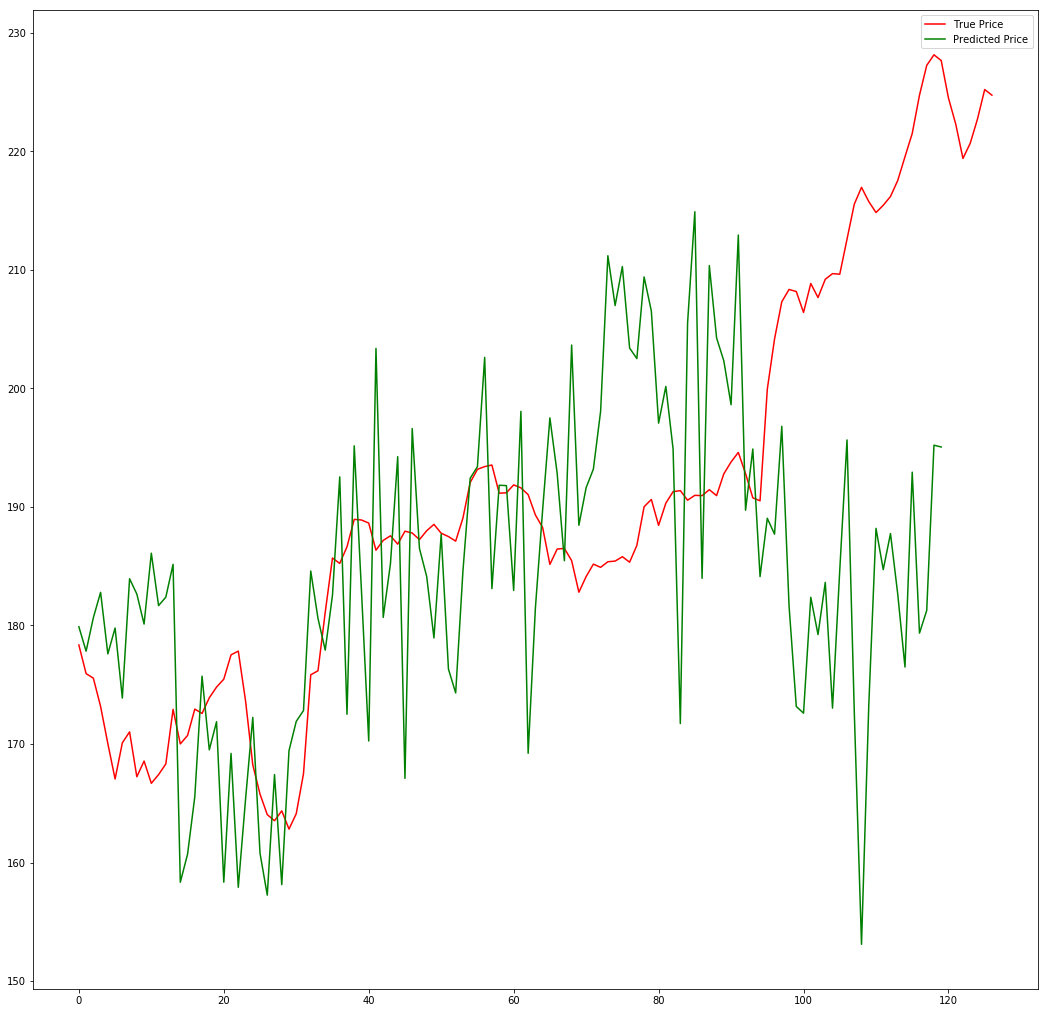

In [8]:
#plot graph of predictions vs true price
plt.figure(figsize = (18,18))
plt.plot(OHLC_mean[4400:], color = 'red', label = 'True Price')
plt.plot(four_month_predictions, color = 'green', label = 'Predicted Price')
plt.legend()
plt.show()

In [9]:
#calculate number of times model was right in predicting daily trends
true_values = OHLC_mean[4400:4520]
counter = 0;
for i in range(len(true_values)-1):
    if true_values[i+1] > true_values[i] and four_month_predictions[i+1] > four_month_predictions[i]:
        counter = counter + 1
    elif true_values[i+1] < true_values[i] and four_month_predictions[i+1] < four_month_predictions[i]:
        counter = counter + 1
print (counter)

58


In [13]:
#calculate number of times model was right in predicting trends in 3-day intervals
three_day_interval = []
for i in range (len(true_values)-1):
    if i %  3 == 0:
        three_day_interval.append(true_values[i])
        
three_day_predictions = []
for i in range (len(four_month_predictions)-1):
    if i % 3 == 0:
        three_day_predictions.append(four_month_predictions[i])
        
counter = 0;
for i in range(len(three_day_predictions)-1):
    if three_day_interval[i+1] > three_day_interval[i] and  three_day_predictions[i+1] >  three_day_predictions[i]:
        counter = counter + 1
    elif three_day_interval[i+1]< three_day_interval[i] and  three_day_predictions[i+1] < three_day_predictions[i]:
        counter = counter + 1
print (counter)

20


In [14]:
#Assuming 1 stock is bought/sold each time. Buying is done when the stock is predicted to go up, else it is sold
profit = 0
for i in range (len(true_values)-1):
    if four_month_predictions[i+1] > four_month_predictions[i]:
        profit = profit + true_values[i+1] - true_values[i]
print (profit)

35.72998074999984


In [15]:
#Assuming 1 stock can only be bought/sold once every 3 days
profit = 0
for i in range (len(three_day_predictions)-1):
    if three_day_predictions[i+1] > three_day_predictions[i]:
        profit = profit + three_day_interval[i+1] - three_day_interval[i]
print (profit)

22.152495249999845


In [16]:
#Assuming initial capital of $1000 and trading is done daily
capital = 1000
capital_values=[]
for i in range (len(true_values)-1):
    if four_month_predictions[i+1] > four_month_predictions[i]:
        capital = (capital/true_values[i])*true_values[i+1]
        capital_values.append(capital)
return_on_capital_daily = capital/1000 -1

print(capital)
print(return_on_capital_daily)
print(capital_values)

1201.4237568748385
0.2014237568748385
[997.8259325507793, 984.2415250250472, 966.9626994191026, 972.2353334913595, 961.406127922064, 966.5888744338203, 993.0337850962122, 997.1809945975463, 1010.1920678073261, 1008.0162427699428, 1013.2476860991189, 1025.0999799196795, 1000.9765826544588, 969.7919852293455, 966.7473267345543, 957.6892567232044, 965.3503838780674, 985.1870853724591, 1034.2567405460125, 1060.3237148884368, 1057.7113236888258, 1070.8453856705191, 1057.8456943252088, 1060.0356797460142, 1056.051316995381, 1055.1944631463662, 1051.0106941913991, 1061.9356307455012, 1078.7864023057098, 1085.0211919956798, 1086.3271169619793, 1072.996055881981, 1071.6118821488096, 1062.0055761178876, 1056.0454962724077, 1038.6139470484918, 1032.8917815879433, 1040.335976118665, 1046.2828631661691, 1044.7431986719894, 1047.4129136391794, 1049.5028534572207, 1067.823014706089, 1078.4619966875061, 1073.9114491860264, 1076.2219360241293, 1079.0540337093973, 1083.550340871202, 1072.0581731589527, 

In [17]:
#Assuming initial capital of $1000 and is done every 3 days
capital = 1000
capital_values_3days = []
for i in range (len(three_day_predictions)-1):
    if three_day_predictions[i+1] > three_day_predictions[i]:
        capital = (capital/three_day_interval[i])*three_day_interval[i+1]
        capital_values_3days.append(capital)
return_on_capital_3days = capital/1000 -1

print(capital)
print(return_on_capital_3days)
print(capital_values_3days)

1121.8995719561703
0.1218995719561704
[970.9143404928051, 962.1524117621683, 960.7682245562279, 978.6646882852469, 927.5179717971212, 930.9070070869795, 999.283296841166, 1050.6434899740989, 1050.867070862578, 1076.4241650317365, 1060.0636732048836, 1072.226861014823, 1077.4313023012196, 1078.8324229631755, 1083.856703589835, 1081.2143901040192, 1091.4582527434538, 1083.8368482763026, 1121.8995719561703]


In [18]:
#calculate daily returns
returns_daily = []
for i in range (len(true_values)-1):
    if four_month_predictions[i+1] > four_month_predictions[i]:
        returns_daily.append((true_values[i+1]-true_values[i])/true_values[i])
returns_daily

[-0.0021740674492207097,
 -0.013614005291489883,
 -0.01755547308929569,
 0.005452779176926278,
 -0.01113846123078765,
 0.005390798291412977,
 0.02735900584194296,
 0.004176302522206991,
 0.013047855184034046,
 -0.0021538726215758665,
 0.005189840309319407,
 0.011697331247989953,
 -0.023532726307448553,
 -0.03115417280034237,
 -0.0031394964499229243,
 -0.009369635437158042,
 0.007999596007870096,
 0.020548706278752805,
 0.04980744865834497,
 0.02520358178053815,
 -0.002463767586190419,
 0.012417435350779382,
 -0.012139652950150554,
 0.002070231445430728,
 -0.0037587062650455616,
 -0.0008113752004522717,
 -0.003964926941041769,
 0.010394695900318253,
 0.015867978314635708,
 0.005779447791188701,
 0.001203593972111632,
 -0.01227168214053231,
 -0.0012900082209842928,
 -0.008964351917841179,
 -0.005612098447982446,
 -0.016506437729667138,
 -0.005509424822196618,
 0.00720713889239889,
 0.005716313944742318,
 -0.001471556639588331,
 0.002555379131047237,
 0.0019953351642189856,
 0.01745603757

In [19]:
from numpy import array
returns_daily = array(returns_daily)

In [20]:
#Calculating annualized sharpe ratio based on daily returns

import math
def sharperatio(returns, risk_free, days):
    return_mean = returns.mean()
    excessreturns = array([x - risk_free for x in returns])
    std_deviation = np.std(excessreturns)
    sharpe_ratio = math.sqrt(days) * return_mean/std_deviation
    return sharpe_ratio

#Annual risk free return rate for Apple is 3.22%

apple_rf = (1+ 3.22*0.01)**(1/252)-1 
print(sharperatio(returns_daily,apple_rf, 252))

3.5571909037144094


In [21]:
returns_3days = []
        
for i in range (len(three_day_predictions)-1):
    if three_day_predictions[i+1] > three_day_predictions[i]:
        returns_3days.append((three_day_interval[i+1]-three_day_interval[i])/three_day_interval[i])

returns_3days

[-0.029085659507194904,
 -0.009024409636579755,
 -0.001438636113176002,
 0.018627243565726124,
 -0.05226173693641869,
 0.0036538756044715895,
 0.07345125692860714,
 0.051397029546363375,
 0.00021280376322947226,
 0.02432000666666666,
 -0.015198926555472227,
 0.011474016247690661,
 0.004853862065599418,
 0.0013004269125682052,
 0.004657146485141318,
 -0.002437880835228532,
 0.009474404644622786,
 -0.006982772312174518,
 0.03511849937599141]

In [22]:
from numpy import array
returns_3days = array(returns_3days)

print(sharperatio(returns_3days,apple_rf, 252))

3.806094128112368


In [23]:
#finding local min and max to find largest peak before drop and then maximum drawdown

capital_values = array(capital_values)
capital_values_3days = array(capital_values_3days)
import numpy as np
from scipy.signal import argrelextrema


def max_drawdown(returns_array):
    
    local_max = returns_array[argrelextrema(returns_array, np.greater)[0]]
    local_min = returns_array[argrelextrema(returns_array, np.less)[0]]

    drop_values = []
    for i in range(len(local_max)):
        drop = local_max[i] - local_min[i]
        drop_values.append(drop)
    
    peak_before_largest_drop = local_max[drop_values.index(max(drop_values))]

    abs_min = min(local_min)

    max_drawdown = (peak_before_largest_drop - abs_min)/peak_before_largest_drop

    return max_drawdown

print(max_drawdown(capital_values))


0.09679540005009814


In [24]:
print(max_drawdown(capital_values_3days))

0.13833412336132855
